<H1>RECKAIR</H1>

<h3><b>Minimization of Maintenance cost for Machinery of wind energy production</b></h3>

In [4]:
# !python.exe -m pip install --upgrade pip
# !pip install seaborn
# !pip install scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<H3>DATA LOADING</H3>

In [5]:
df=pd.read_csv("ReckAir_Train_Data.csv")

In [6]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1 -2.909996 -2.568662  4.109032  1.316672 -1.620594 -3.827212 -1.616970   
2  4.283674  5.105381  6.092238  2.639922 -1.041357  1.308419 -1.876140   
3  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
4 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440  2.846296  2.235198   
1  0.669006  0.387045  0.853814  ... -3.782686 -6.823172  4.908562  0.481554   
2 -9.582412  3.469504  0.763395  ... -3.097934  2.690334 -1.643048  7.566482   
3 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780 -2.467514  1.894599   
4 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550  4.086219  2.292138   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1  5.338051  2.381297 -3.127756  3.527309 -3.019581       0  
2 -3.197647 -3.495672  8.104779  0.562085 -4.227426       0  
3 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
4  5.360850  0.351993  2.940021  3.839160 -4.309402       0  

[5 rows x 41 columns]

In [7]:
#check for the data types for it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

In [8]:
df.tail()

V1         V2        V3        V4        V5        V6        V7  \
39995 -3.896979  -3.942407 -0.351364 -2.417462  1.107546 -1.527623 -3.519882   
39996 -3.187322 -10.051662  5.695955 -4.370053 -5.354758 -1.873044 -3.947210   
39997 -2.686903   1.961187  6.137088  2.600133  2.657241 -4.290882 -2.344267   
39998  0.521278   0.096069  8.457178  2.137915 -1.635866 -2.712731 -2.692638   
39999  2.403476  -1.336369  6.450749 -5.356242 -0.433735  0.254771 -1.119585   

             V8        V9       V10  ...       V32       V33       V34  \
39995  2.054792 -0.233996 -0.357687  ...  7.112162  1.476080 -3.953710   
39996  0.679420 -2.389254  5.456756  ...  0.402812  3.163661  3.752095   
39997  0.974004 -1.027462  0.497421  ...  6.620811 -1.988786 -1.348901   
39998 -3.410475  1.935682  2.012469  ... -1.256613 -1.135704  1.433714   
39999 -2.523423 -0.653532  2.315818  ... -4.309840 -0.708936 -1.358665   

            V35       V36       V37       V38       V39       V40  Target  
39995  1.855555  5.029209  2.082588 -6.409304  1.477138 -0.874148       0  
39996  8.529894  8.450626  0.203958 -7.129918  4.249394 -6.112267       0  
39997  3.951801  5.449706 -0.455411 -2.202056  1.678229 -1.974413       0  
39998  5.905493  3.751847 -1.866539 -1.917547  2.573462 -5.018783       0  
39999  1.639206  7.766085 -0.244776 -1.123941  2.872102  1.901951       0  

[5 rows x 41 columns]

<H1>Data Information</H1>

In [9]:
#check for the missing values
df.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [10]:
#check for the duplicate values
df.duplicated().sum()

np.int64(0)

In [11]:
#check for classes types
df['Target'].value_counts()

Target
0    37813
1     2187
Name: count, dtype: int64

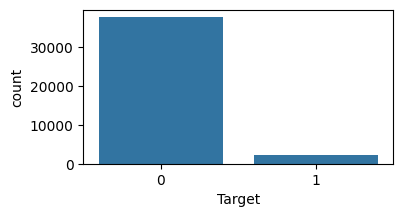

In [12]:
plt.figure(figsize=(4,2))
sns.countplot(x=df['Target'])
plt.show()

In [13]:
df['Target'].value_counts(normalize=True) * 100


Target
0    94.5325
1     5.4675
Name: proportion, dtype: float64

As we can see from above that percentage of success is 94.5% whereas percentage of failure is 5.46% so we have to maintain to use stratify to maintain this ratio

<H2>Train test split</H2>

In [ ]:
!pip install -U scikit-learn

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop('Target',axis=1),df['Target'],test_size=0.2,random_state=2,stratify=df['Target'])
y_train.shape

(32000,)

<H1>Exploratory Data Analysis</H1>

<H3>Univariate Anaylsis</H3>

<H4>Outlier Detection</H4>

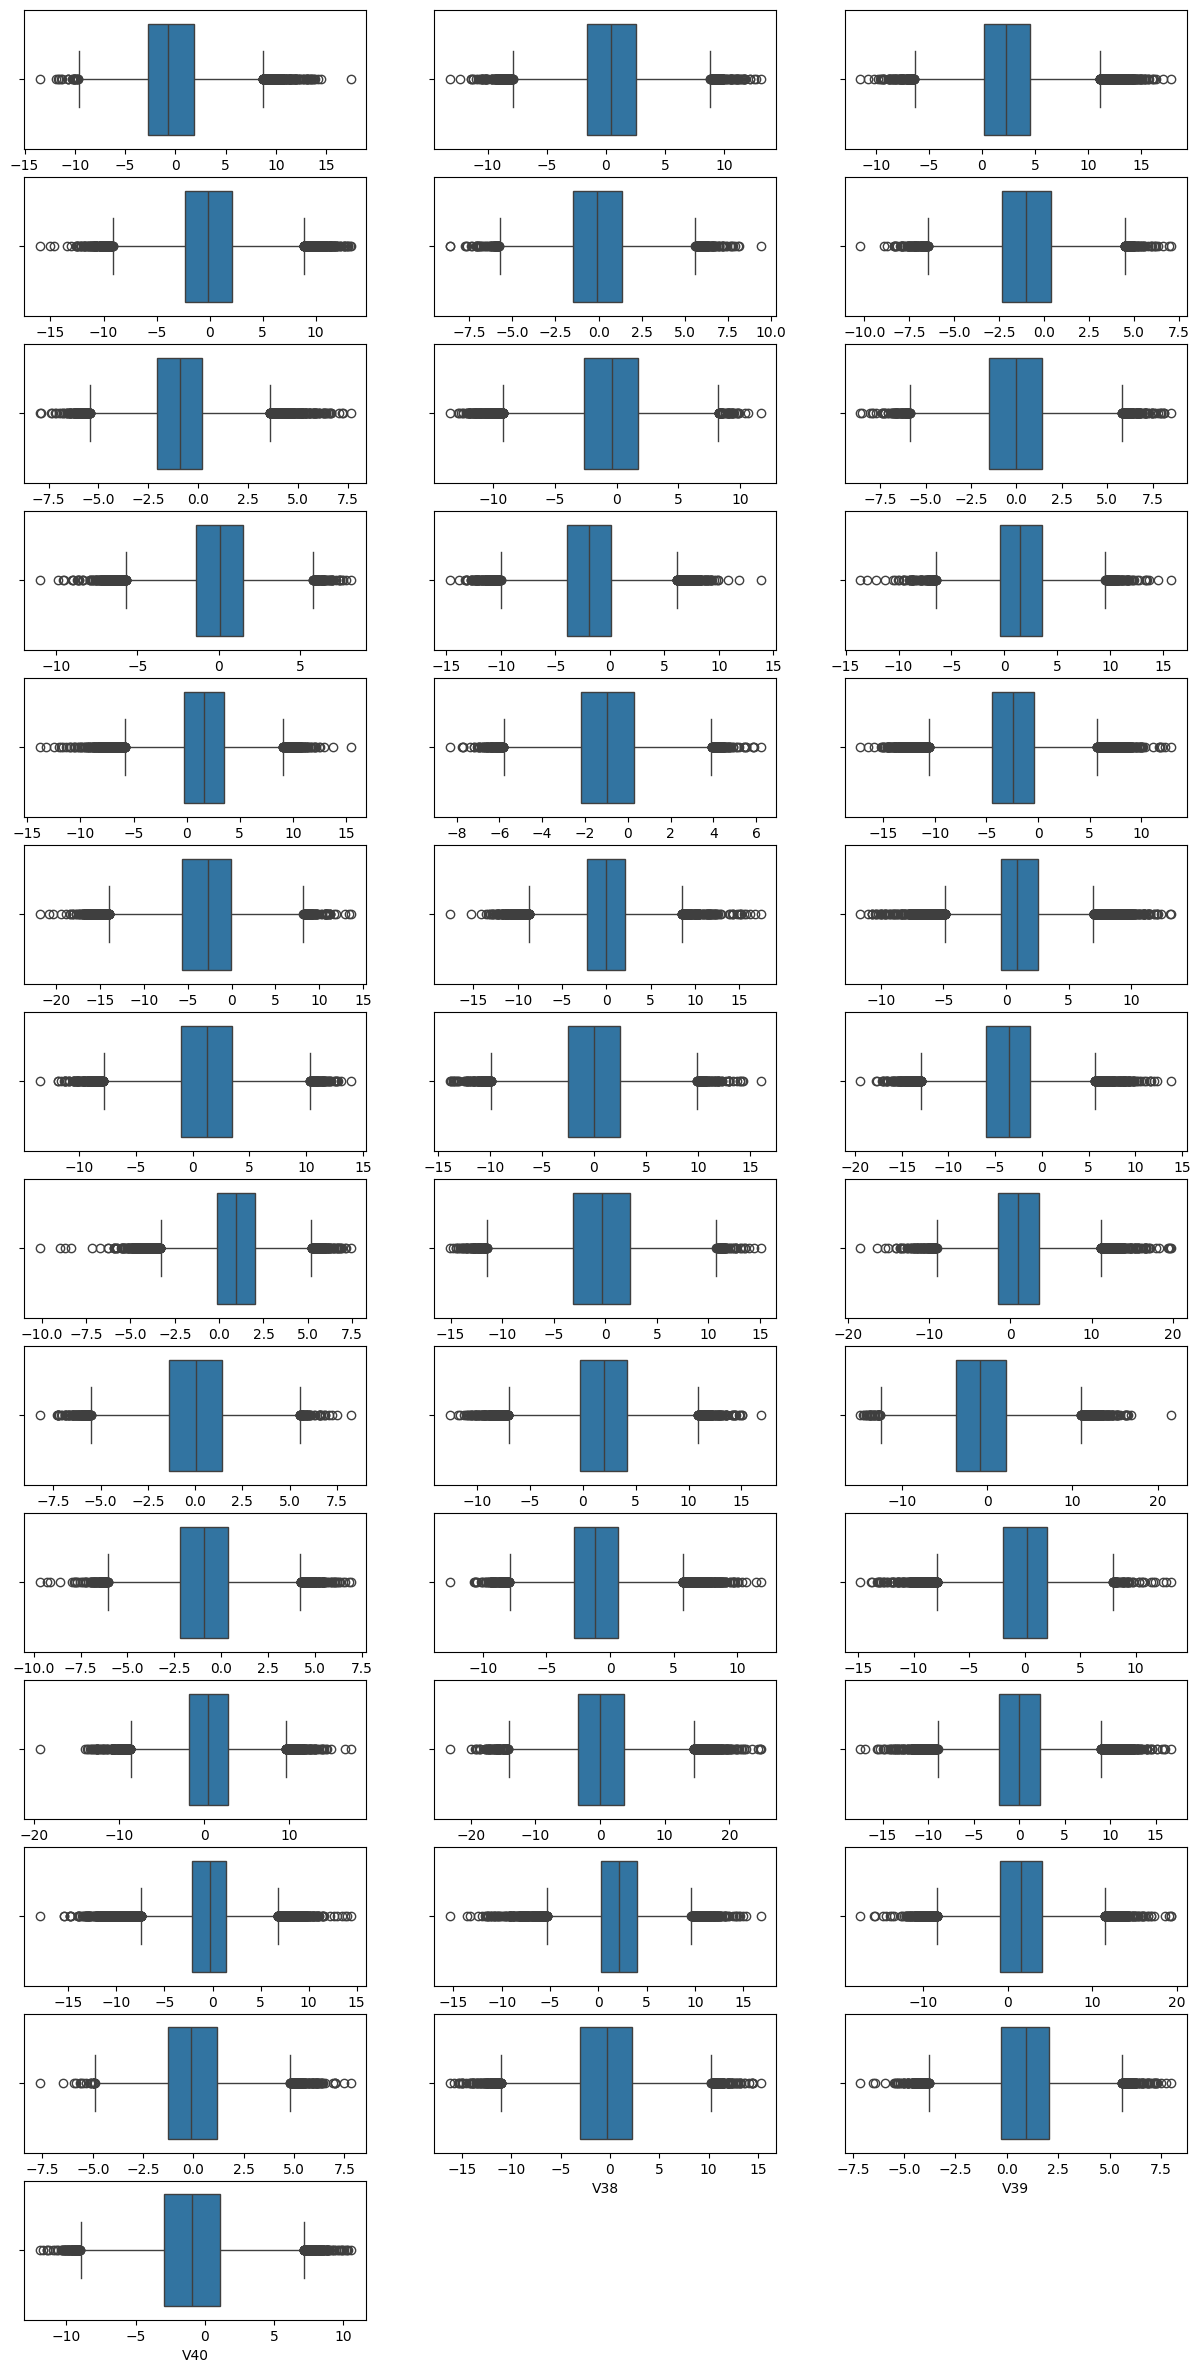

In [15]:
#checking for the outliers

fig =plt.figure(figsize=(15,30))

for i in range(1,41):
    plt.subplot(14,3,i)
    sns.boxplot(x=X_train[f'V{i}'])

fig.show()

<p>AS we can see there are outlier present in the dataset which can alter the model training</p>

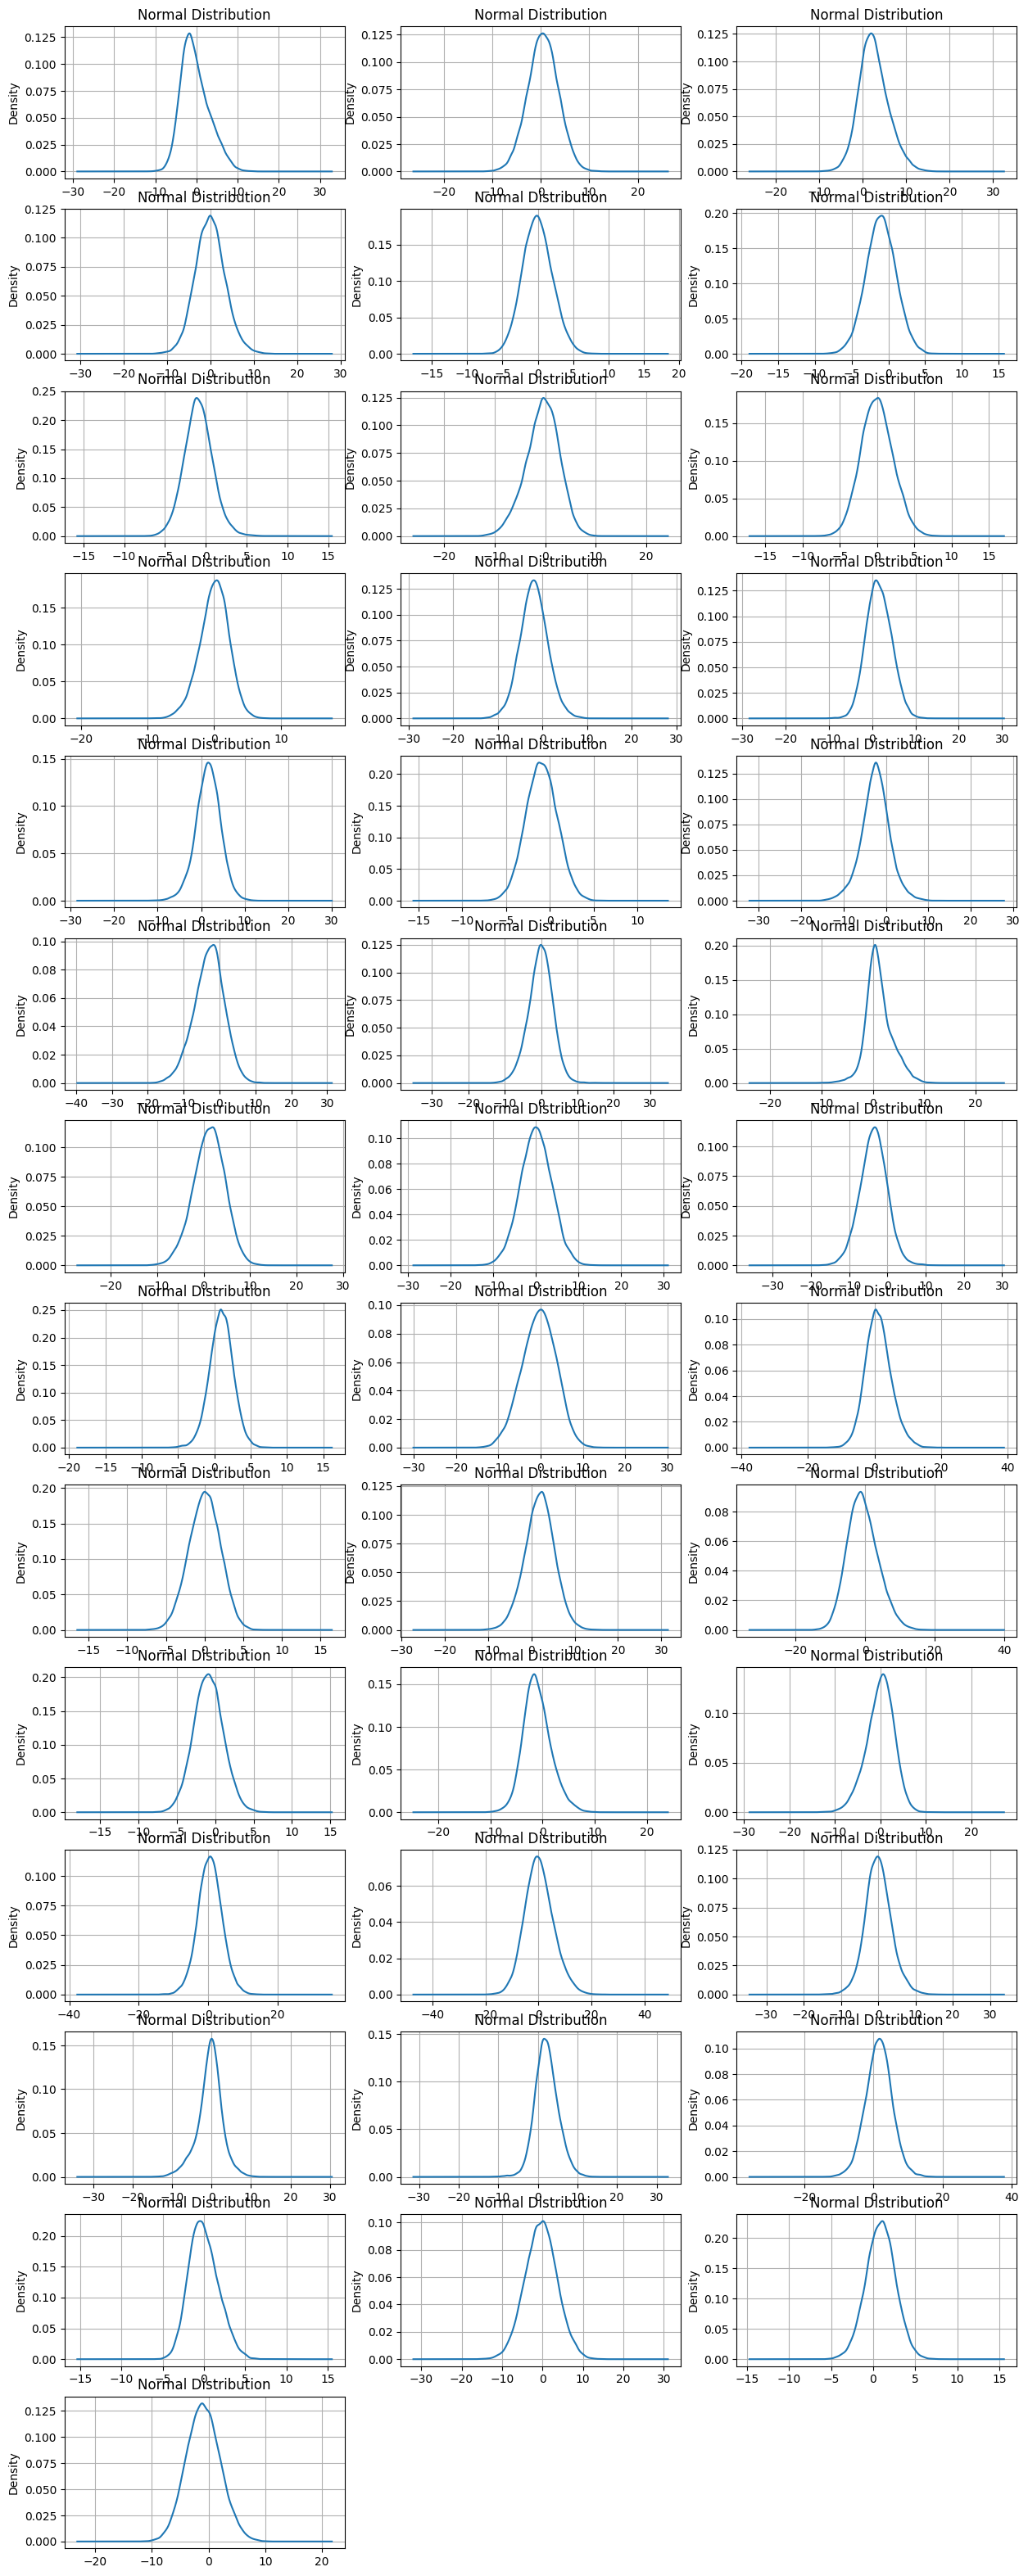

In [16]:
#checking for distribution of of each feature

fig=plt.figure(figsize=(15,40))

for i in range(1,41):
    plt.subplot(14,3,i)
    X_train[f'V{i}'].plot(kind='kde')
    plt.title("Normal Distribution")
    plt.grid()
fig.show()

In [17]:
#To check the data is normally distributed or not
for i in range(1,41):
    print(X_train[f"V{i}"].skew())

0.542759321306416
-0.030633384326837435
0.3246956466624716
0.11116434295359477
0.1209441484295974
-0.007805274670139285
0.17393686958159604
-0.2696044732368006
0.09877152710391217
-0.25064189018335636
0.05288625216697085
0.0916535799664021
-0.19444757933426293
0.009040080235823056
-0.059361467234289575
-0.21163738989696484
-0.13912521516586923
0.3466721656751473
-0.15347111028778498
-0.01957742134652395
-0.011122044641579025
-0.1508082177679465
-0.11548187028622453
0.24820776271639455
-0.08015856101896586
-0.07829257369113674
0.30655794405068143
0.05844351738992407
0.3649706881737875
-0.35361522027102193
0.015734156030632128
0.25264120791733685
0.13036229707412197
-0.3705497407546961
0.07111148825794887
-0.01755629172275766
0.30828830764378734
-0.010804970763388396
-0.03799263731586925
0.10104166298247971


<H3>Bivariate Analysis</H3>

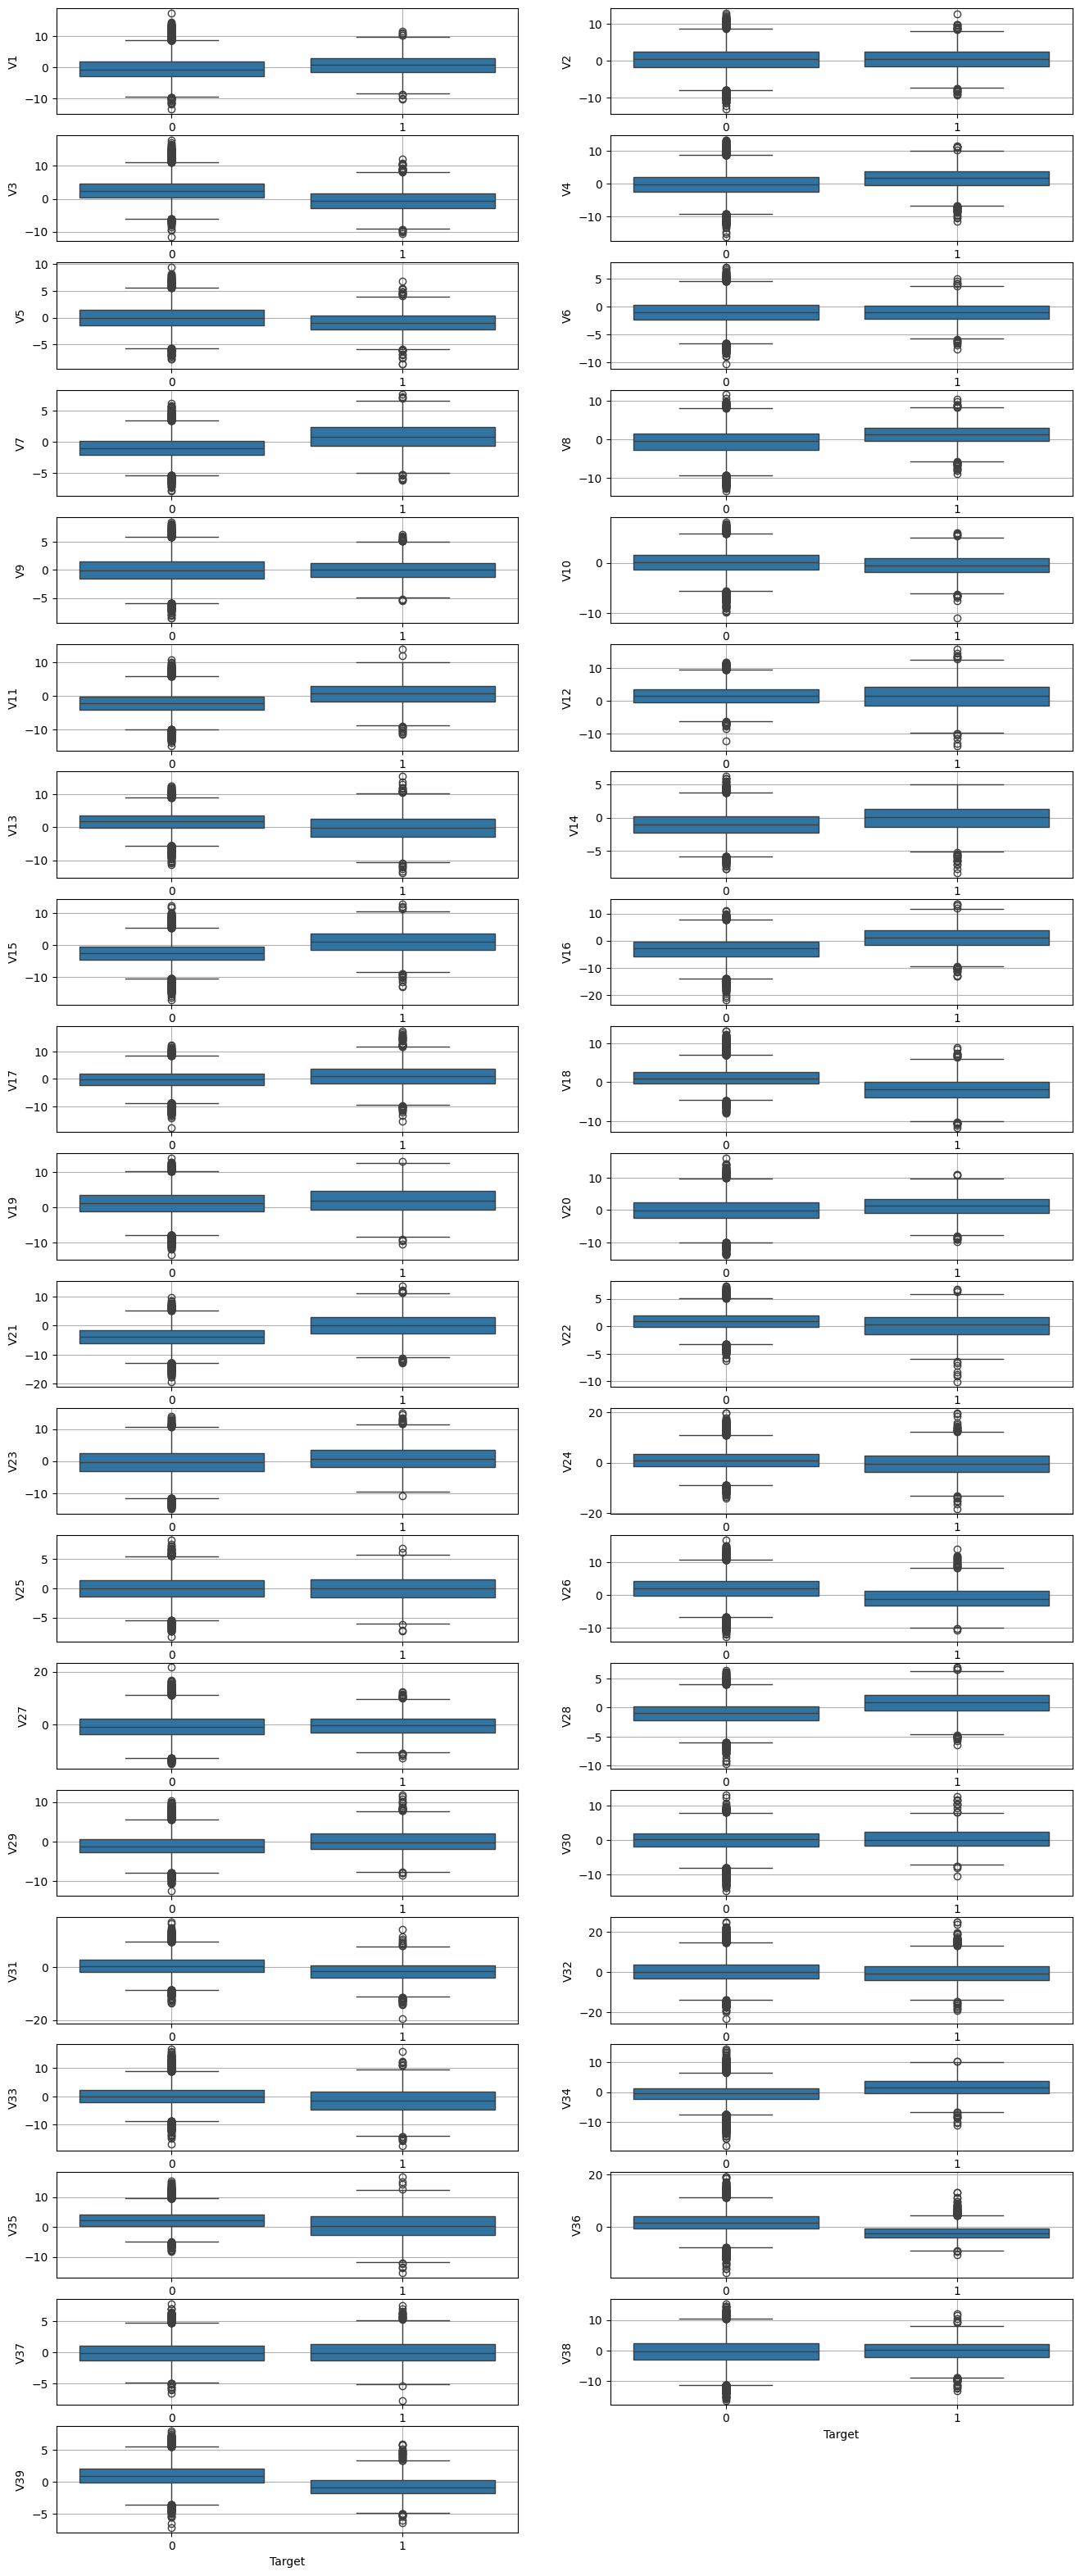

In [18]:
fig=plt.figure(figsize=(16,40))
for i in range(1,40):
    plt.subplot(20,2,i)
    sns.boxplot(x=y_train,y=X_train[f"V{i}"],)
    plt.grid()

fig.show()

<H4><b>Applying ANOVA Testing (Numerical vs categorical) to know which features dominates</b></H4>

In [20]:
from scipy.stats import f_oneway,ttest_ind

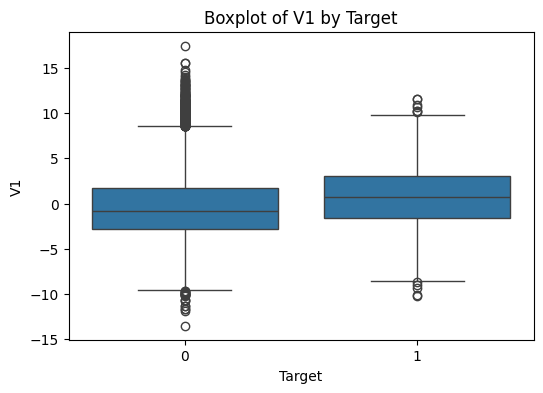

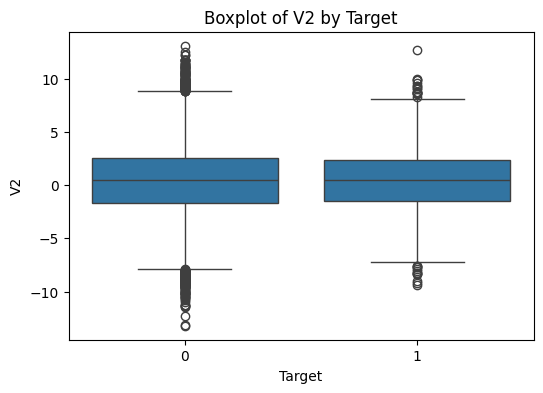

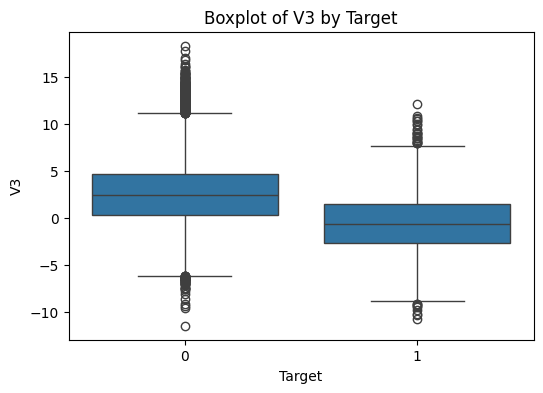

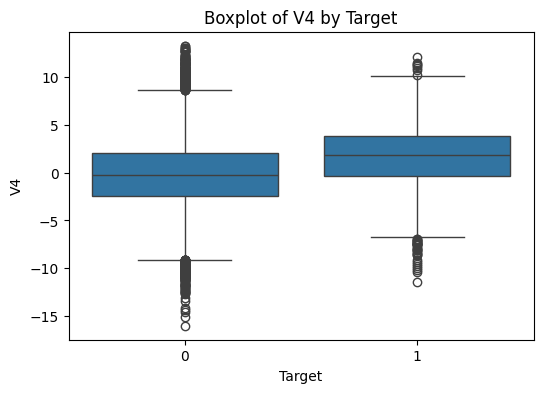

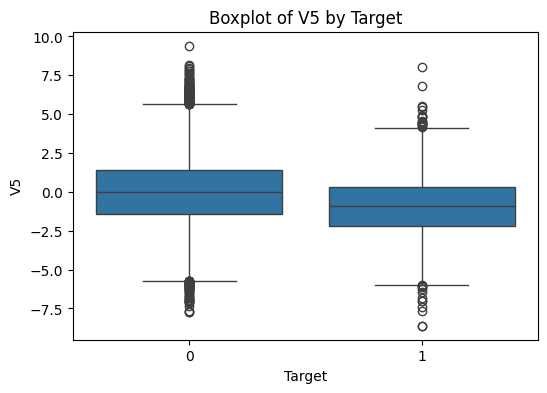

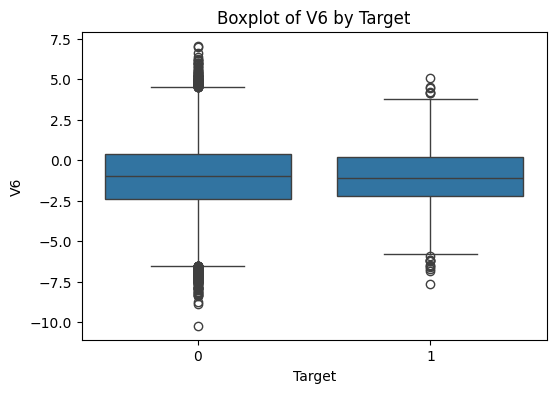

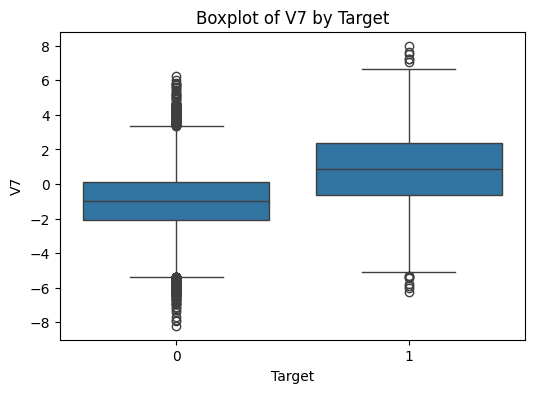

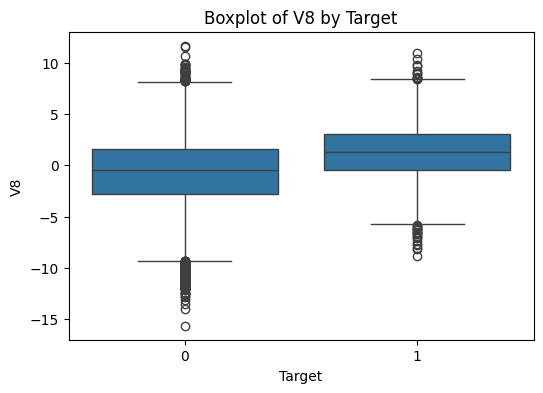

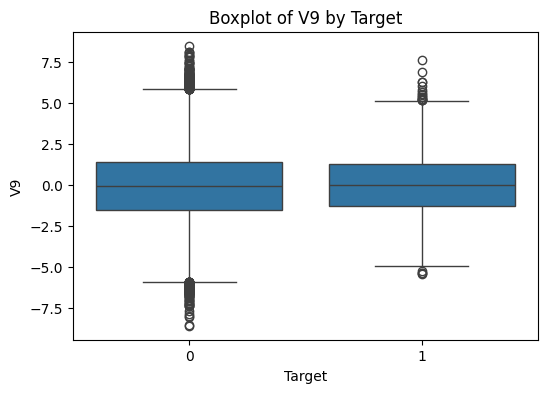

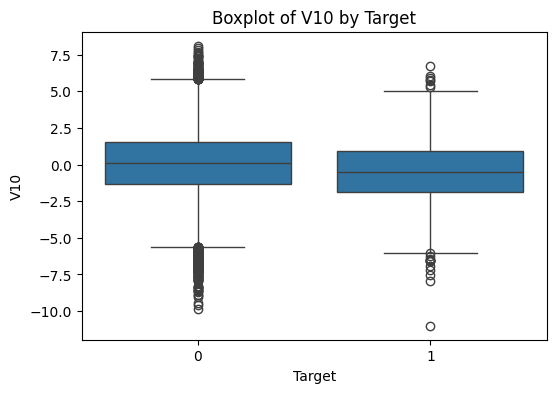

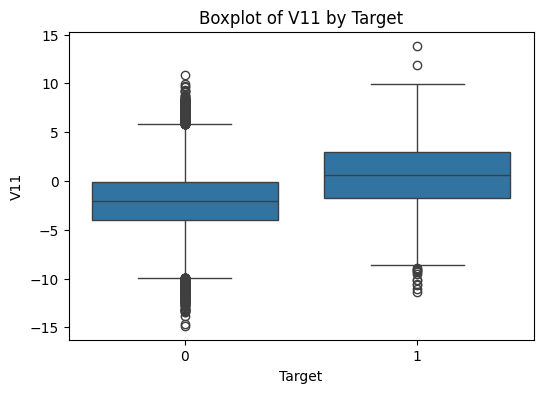

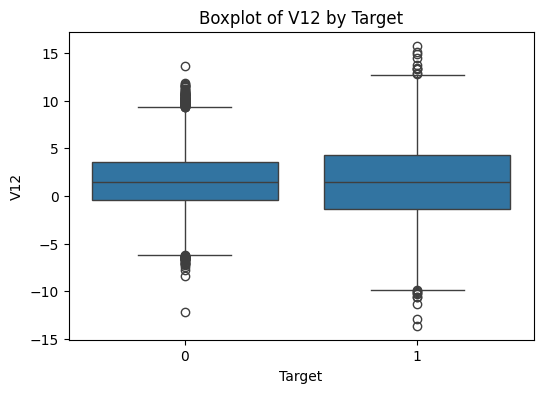

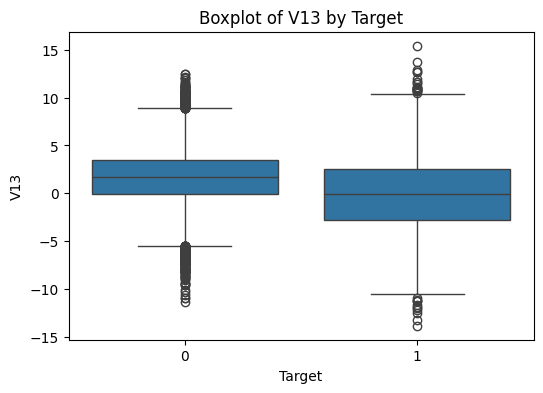

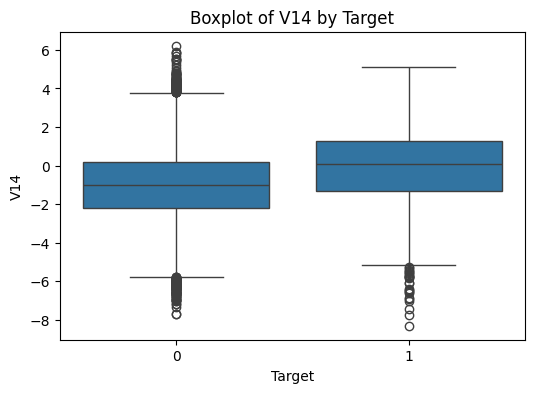

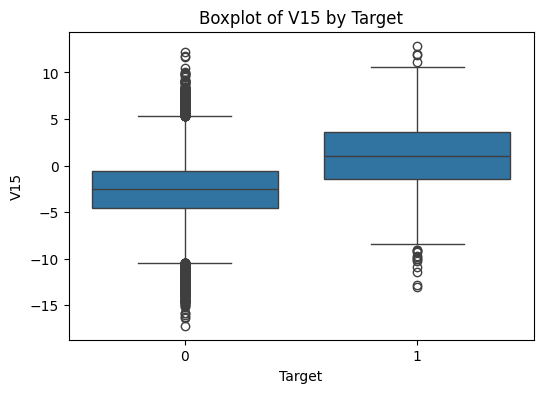

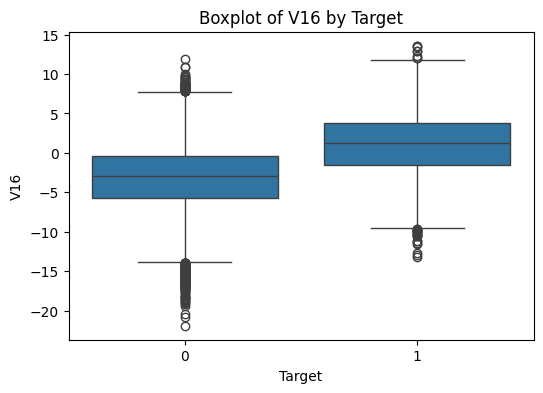

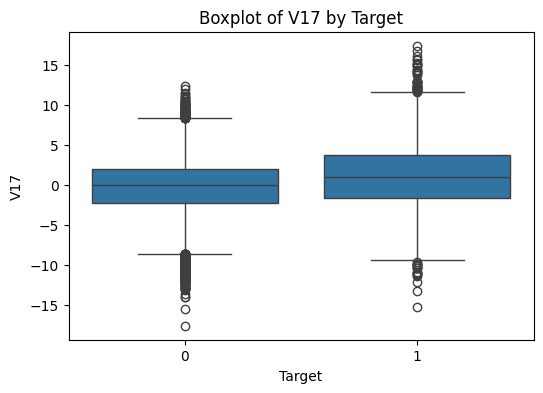

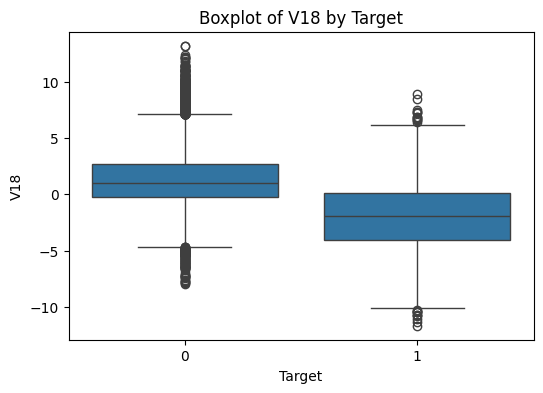

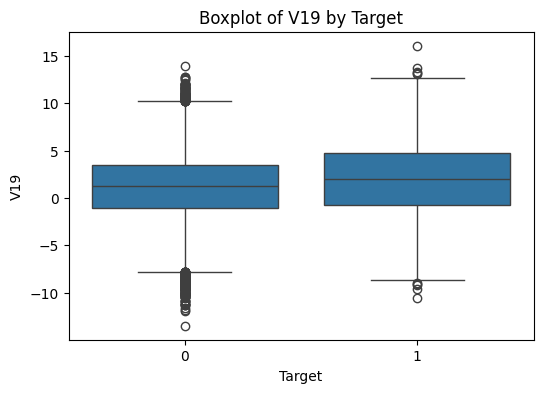

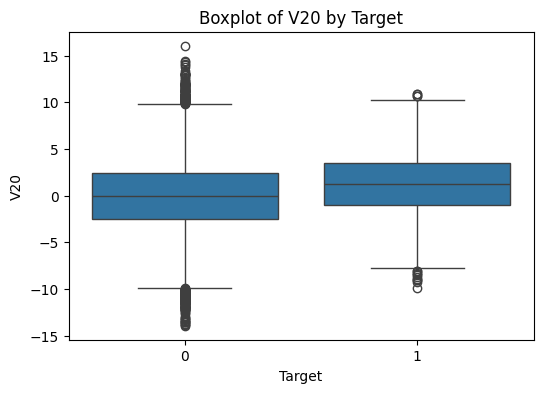

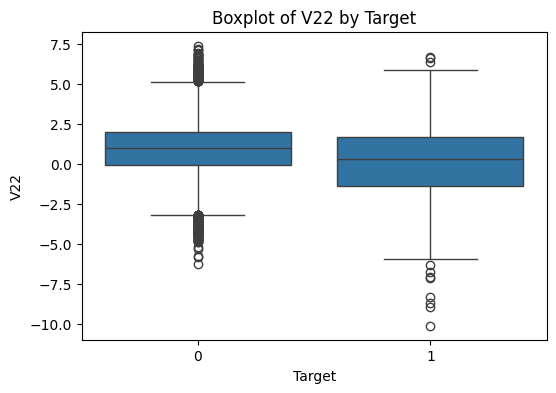

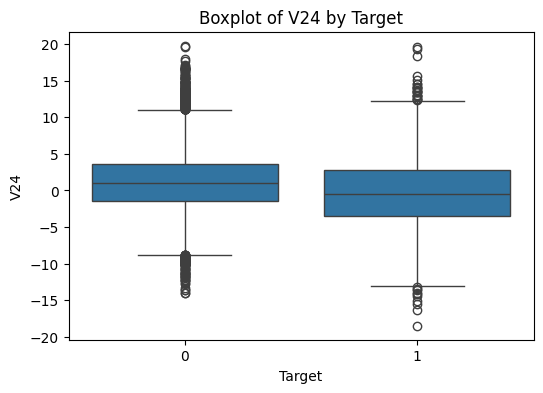

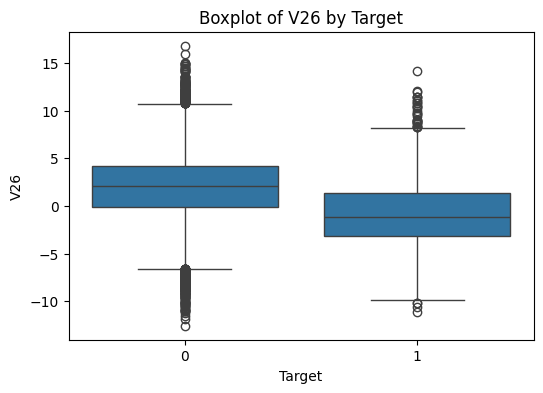

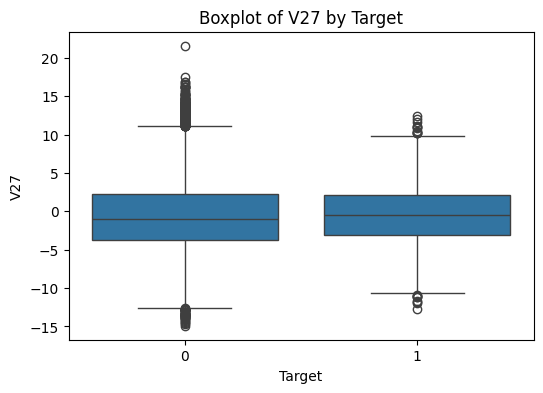

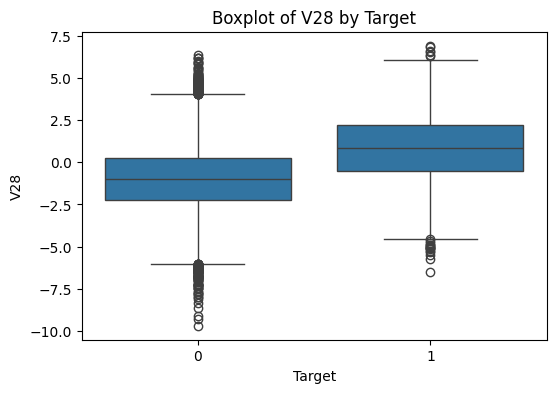

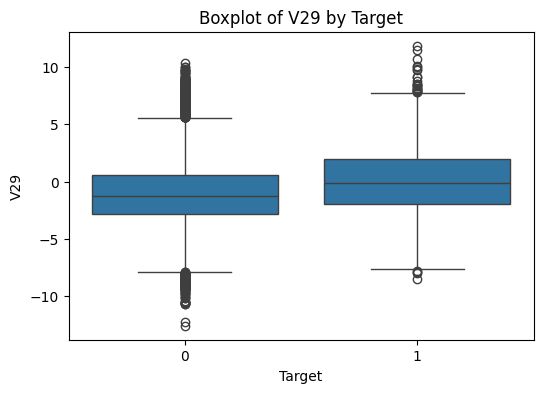

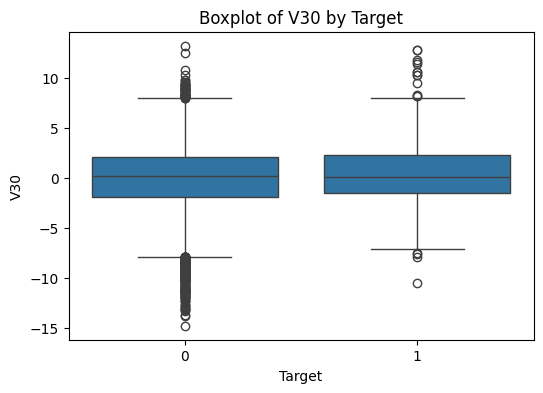

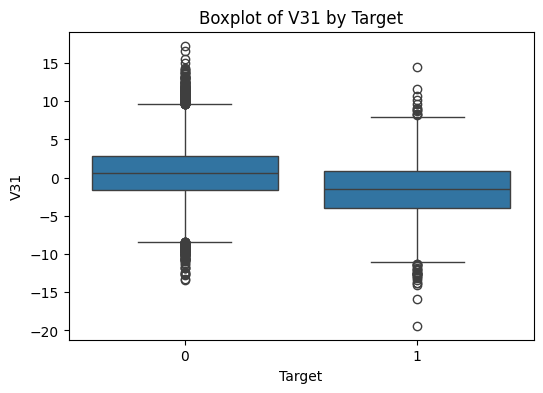

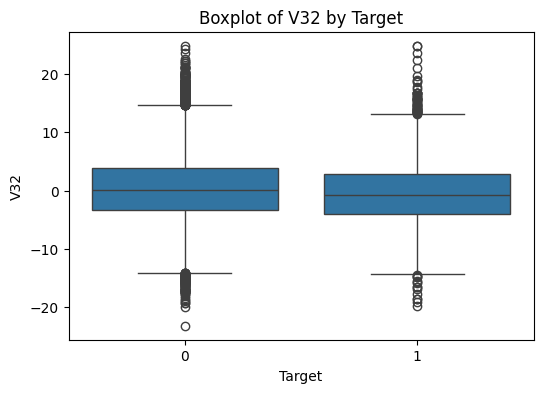

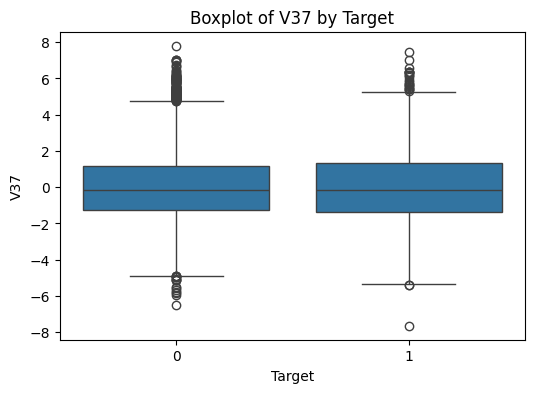

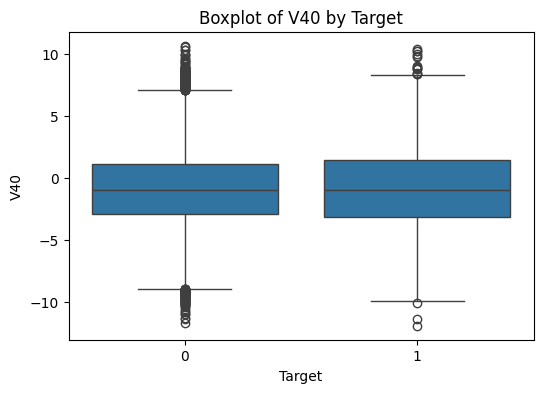

Significant features based on ANOVA (p < 0.05):
   Feature  ANOVA_p_value
2       V3   0.000000e+00
6       V7   0.000000e+00
17     V18   0.000000e+00
10     V11   0.000000e+00
14     V15   0.000000e+00
15     V16   0.000000e+00
27     V28   0.000000e+00
20     V21   0.000000e+00
38     V39   0.000000e+00
35     V36   0.000000e+00
25     V26  5.994051e-295
33     V34  1.253549e-218
34     V35  9.489467e-196
30     V31  2.997356e-189
12     V13  3.505081e-175
7       V8  1.809415e-167
21     V22  1.378124e-135
3       V4  1.907679e-119
13     V14  3.540860e-116
32     V33  5.321705e-110
28     V29   7.301630e-93
4       V5   4.815982e-89
16     V17   5.679707e-81
23     V24   1.577556e-67
22     V23   3.609749e-55
19     V20   4.429387e-51
18     V19   1.227615e-31
9      V10   2.957392e-30
29     V30   2.851795e-13
31     V32   4.347795e-11
11     V12   5.725652e-03
8       V9   2.788189e-02
26     V27   3.233630e-02


In [21]:
features = df.columns.drop("Target")

# Store results
anova_results = []

for feature in features:
    group_0 = df[df['Target'] == 0][feature]
    group_1 = df[df['Target'] == 1][feature]

    # ANOVA
    f_stat, p_val = f_oneway(group_0, group_1)
    anova_results.append((feature, p_val))

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Target', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Target')
    plt.show()

# Create a DataFrame of ANOVA p-values
anova_df = pd.DataFrame(anova_results, columns=["Feature", "ANOVA_p_value"])
anova_df.sort_values(by="ANOVA_p_value", inplace=True)

# Display features with p-value < 0.05 (significant)
significant_features = anova_df[anova_df["ANOVA_p_value"] < 0.05]
print("Significant features based on ANOVA (p < 0.05):")
print(significant_features)

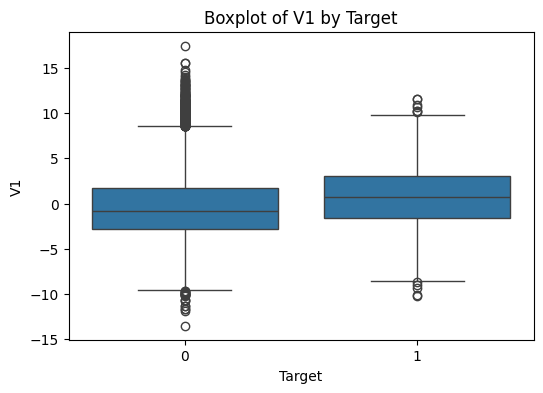

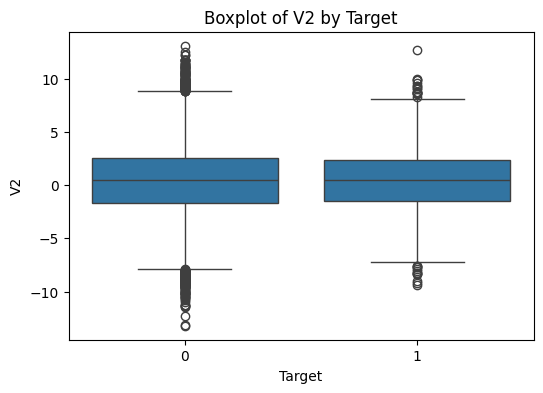

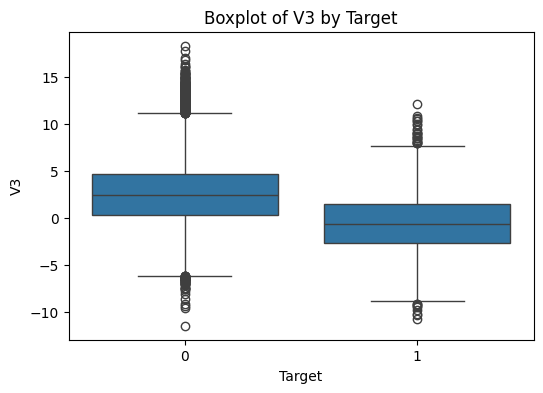

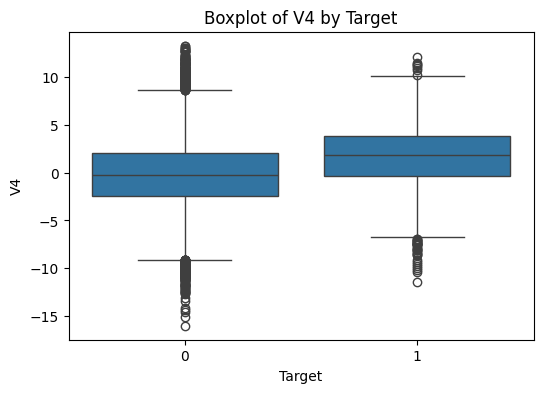

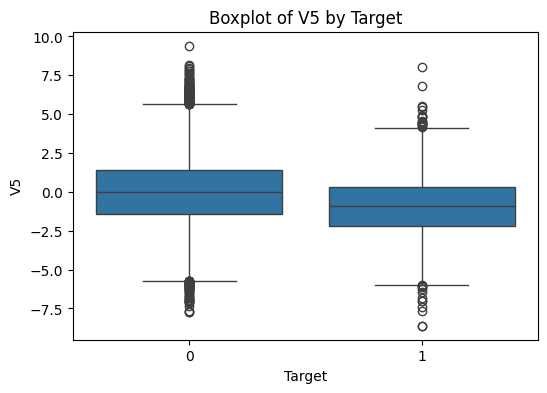

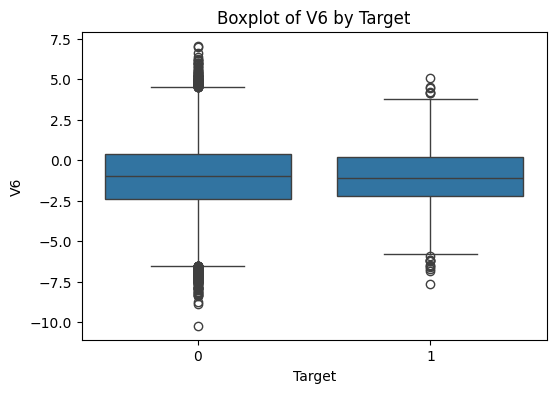

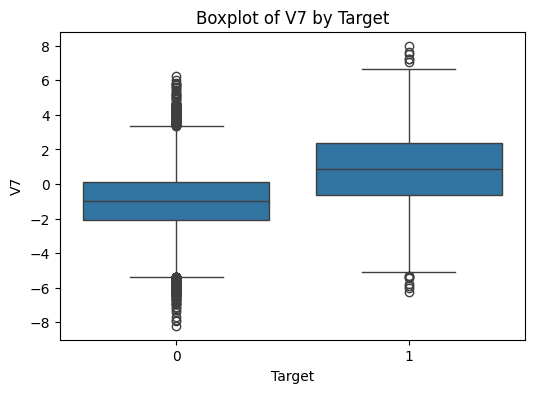

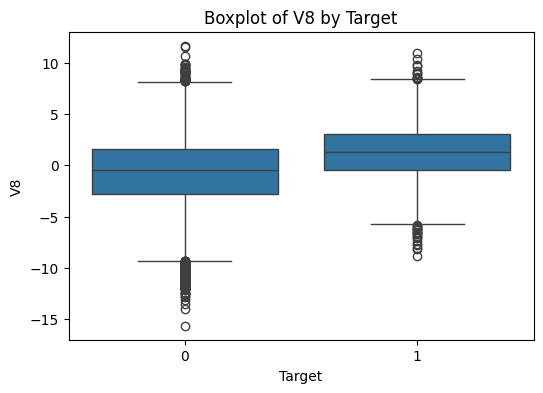

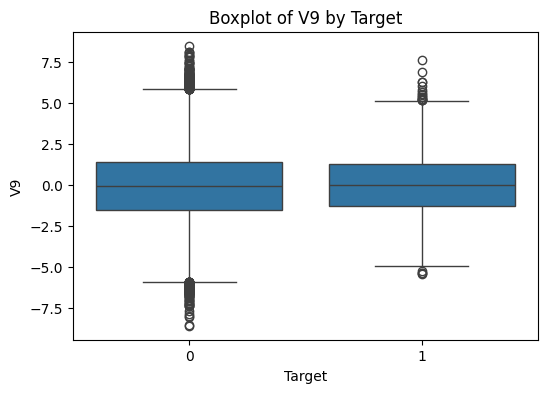

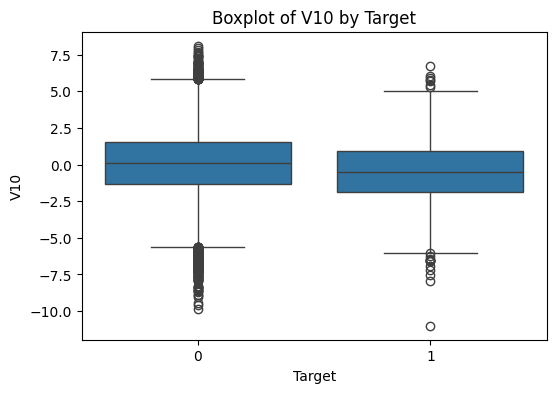

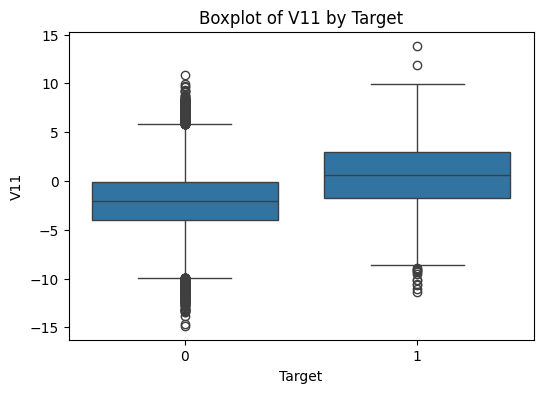

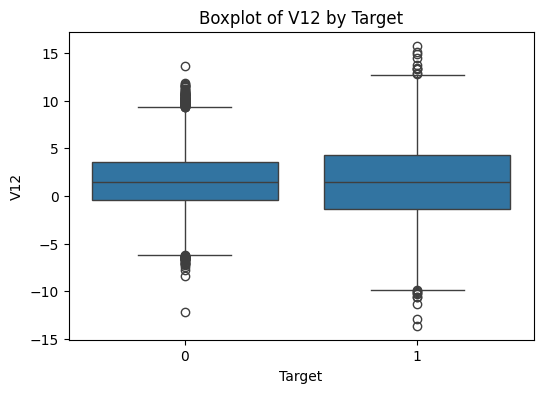

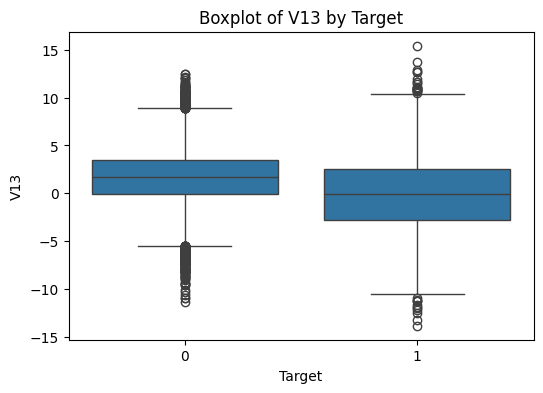

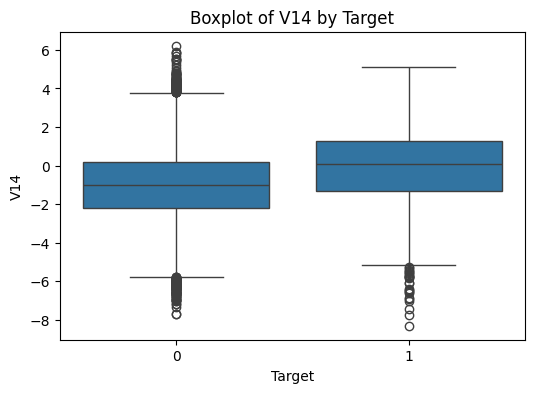

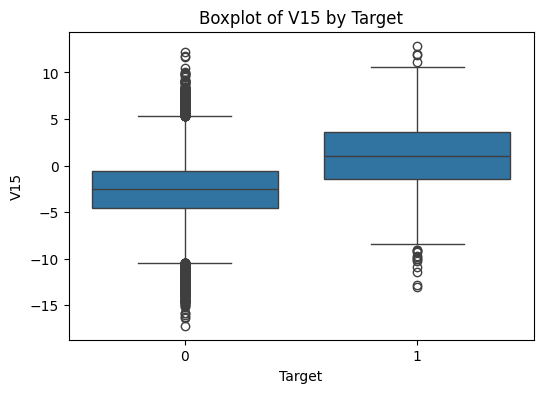

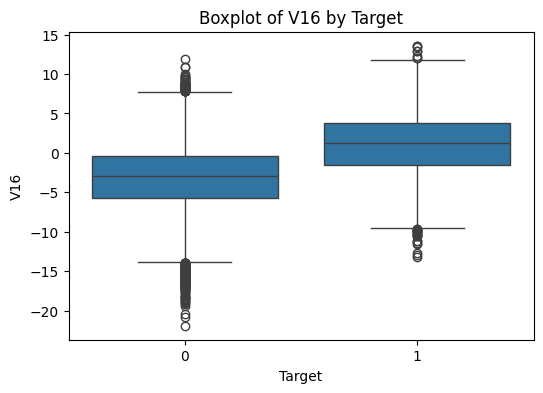

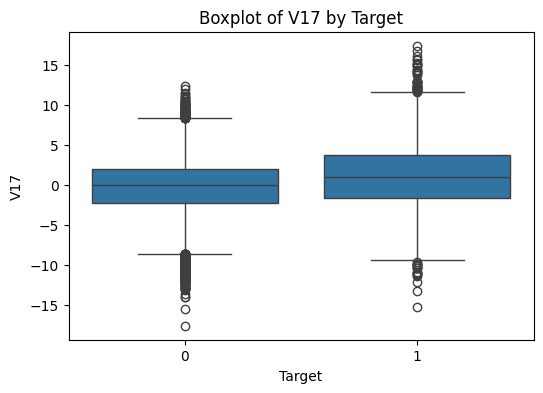

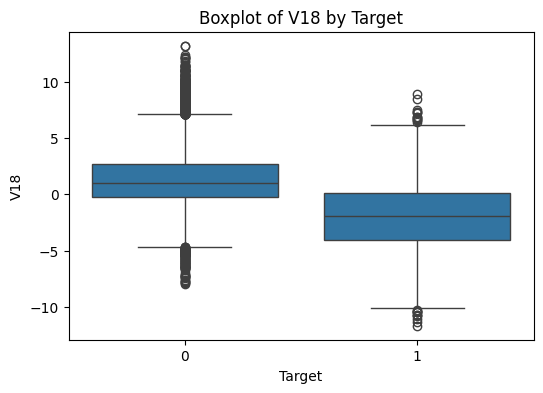

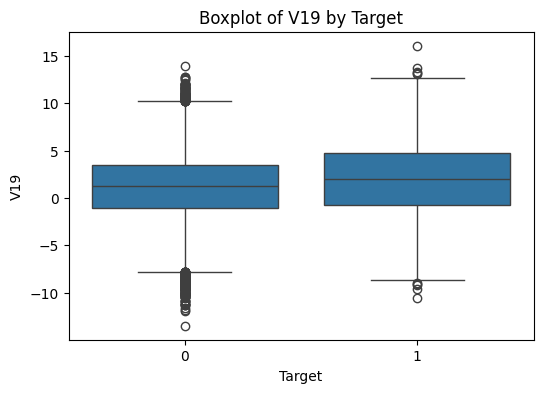

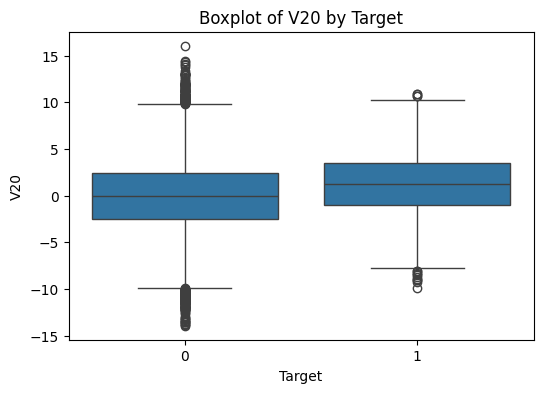

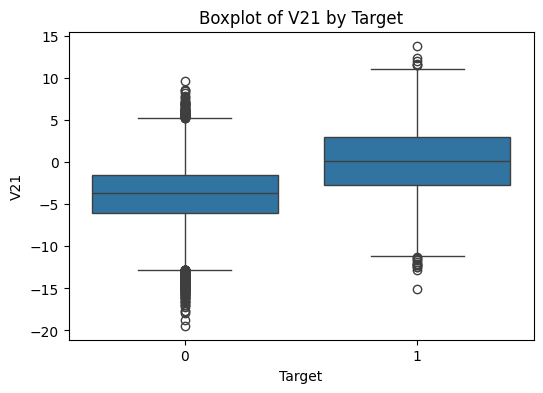

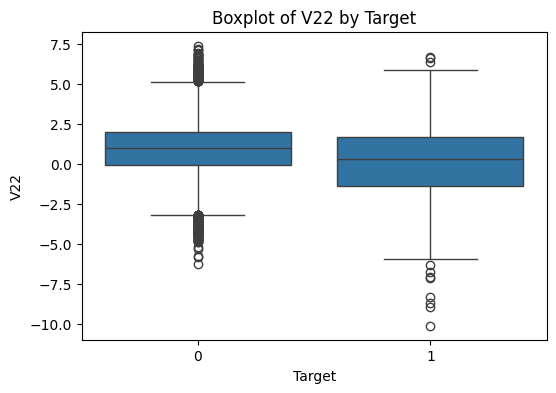

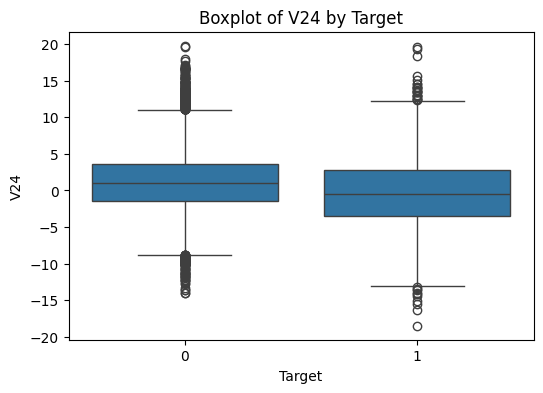

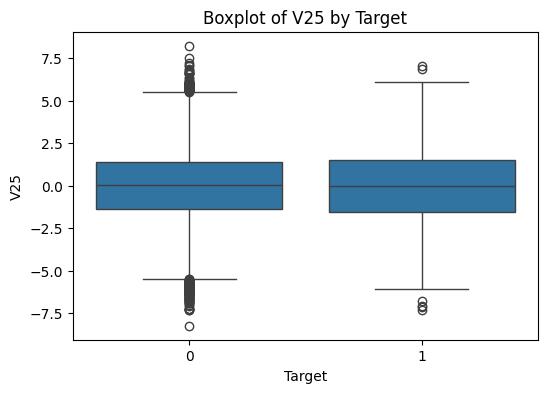

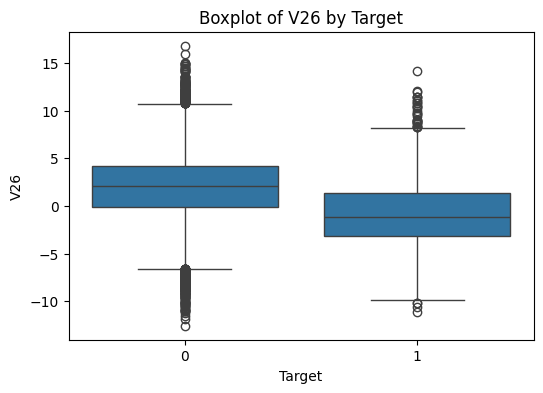

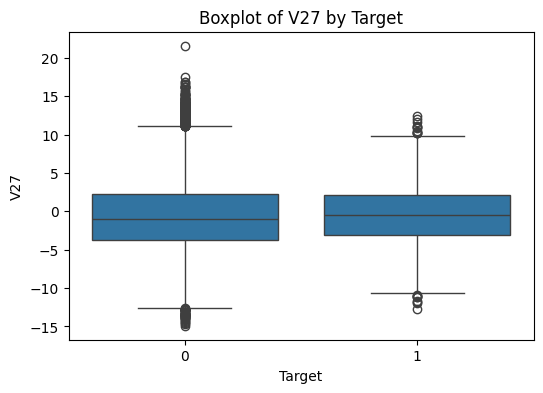

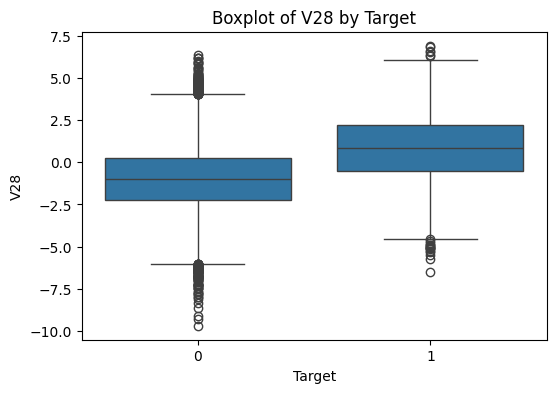

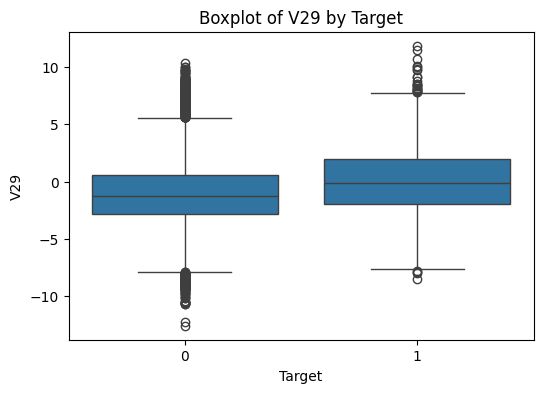

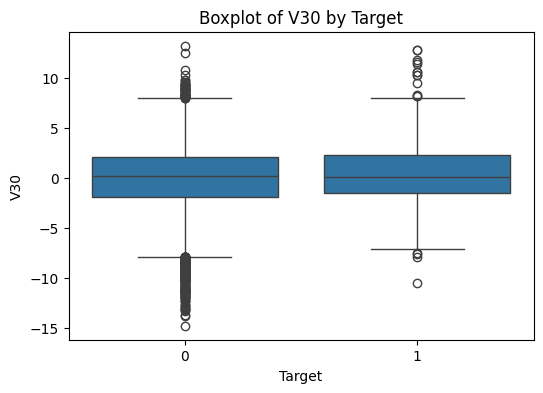

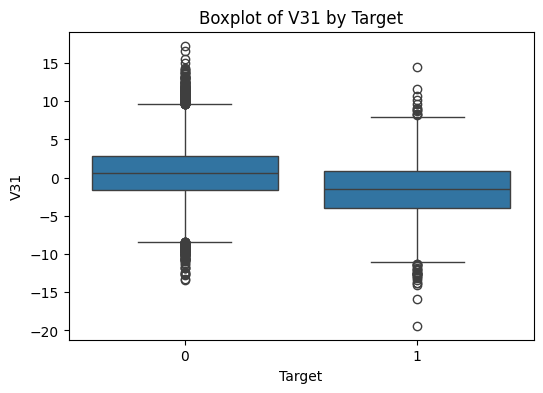

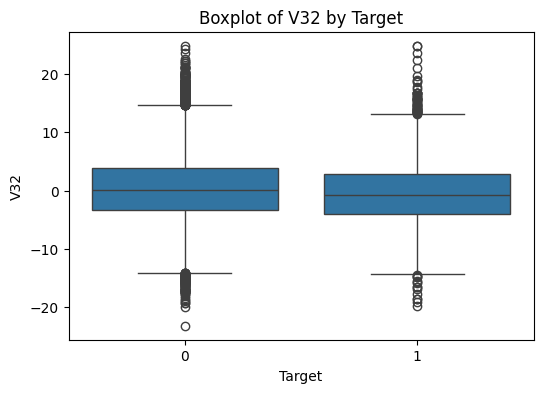

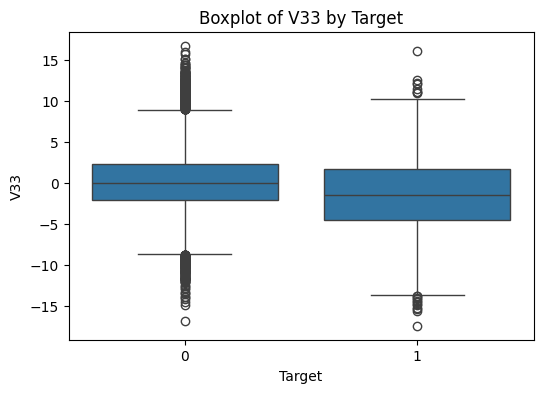

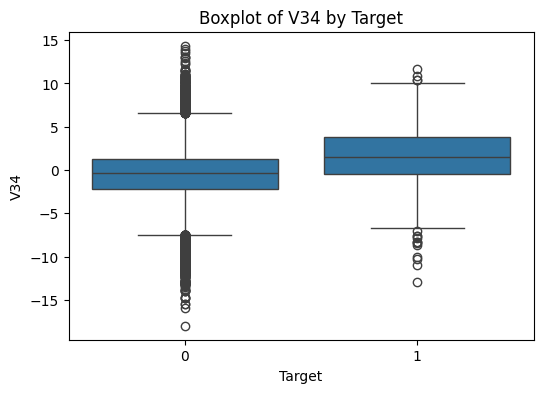

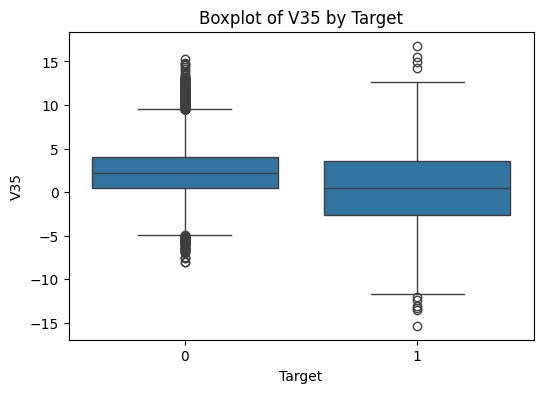

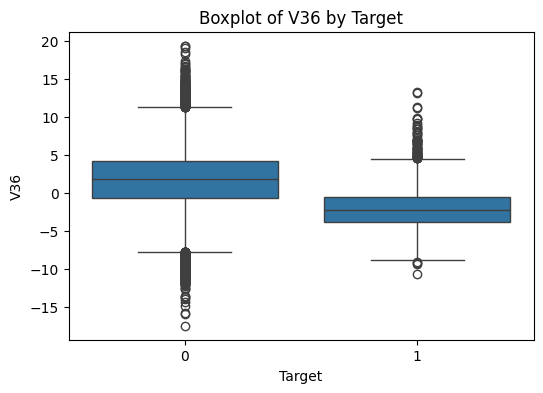

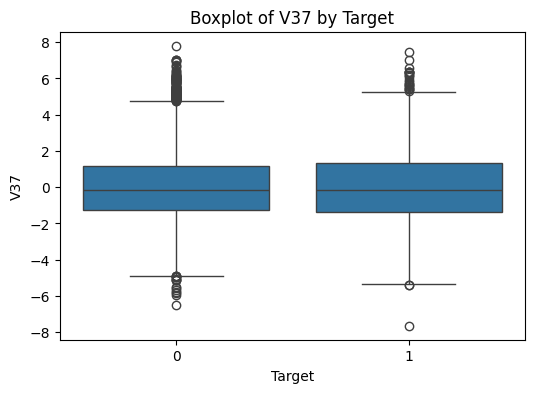

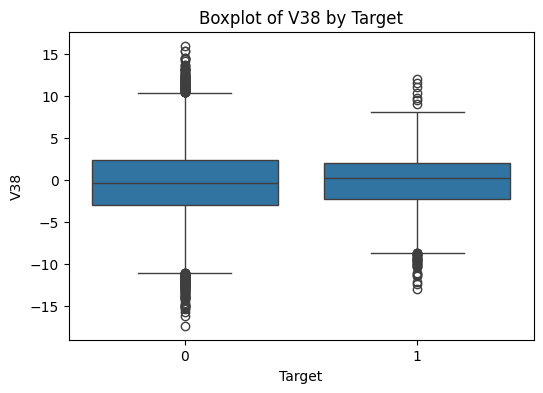

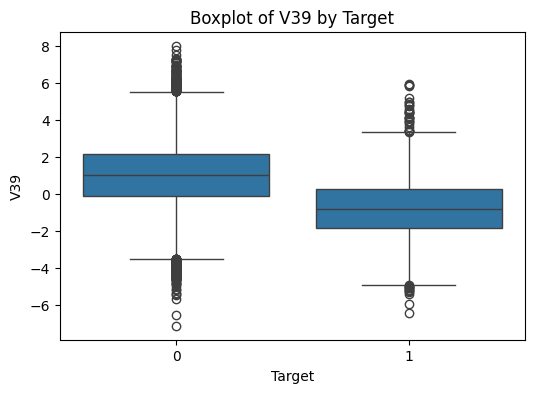

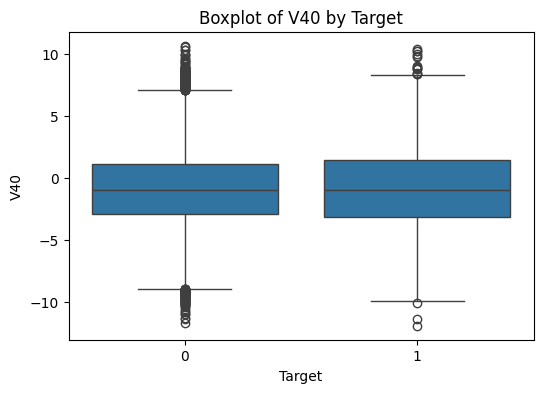

Significant features based on ttest (p < 0.05):
   Feature  ttest_p_value
2       V3   0.000000e+00
6       V7   0.000000e+00
17     V18   0.000000e+00
10     V11   0.000000e+00
14     V15   0.000000e+00
15     V16   0.000000e+00
27     V28   0.000000e+00
20     V21   0.000000e+00
38     V39   0.000000e+00
35     V36   0.000000e+00
25     V26  5.994051e-295
33     V34  1.253549e-218
34     V35  9.489467e-196
30     V31  2.997356e-189
12     V13  3.505081e-175
7       V8  1.809415e-167
21     V22  1.378124e-135
3       V4  1.907679e-119
13     V14  3.540860e-116
32     V33  5.321705e-110
28     V29   7.301630e-93
4       V5   4.815982e-89
16     V17   5.679707e-81
23     V24   1.577556e-67
22     V23   3.609749e-55
19     V20   4.429387e-51
18     V19   1.227615e-31
9      V10   2.957392e-30
29     V30   2.851795e-13
31     V32   4.347795e-11
11     V12   5.725652e-03
8       V9   2.788189e-02
26     V27   3.233630e-02


In [22]:
# Store results
ttest_results = []

for feature in features:
    group_0 = df[df['Target'] == 0][feature]
    group_1 = df[df['Target'] == 1][feature]

    # ANOVA
    f_stat, p_val = ttest_ind(group_0, group_1)
    ttest_results.append((feature, p_val))

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Target', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Target')
    plt.show()

# Create a DataFrame of ANOVA p-values
ttest_df = pd.DataFrame(ttest_results, columns=["Feature", "ttest_p_value"])
ttest_df.sort_values(by="ttest_p_value", inplace=True)

# Display features with p-value < 0.05 (significant)
significant_features = ttest_df[ttest_df["ttest_p_value"] < 0.05]
print("Significant features based on ttest (p < 0.05):")
print(significant_features)

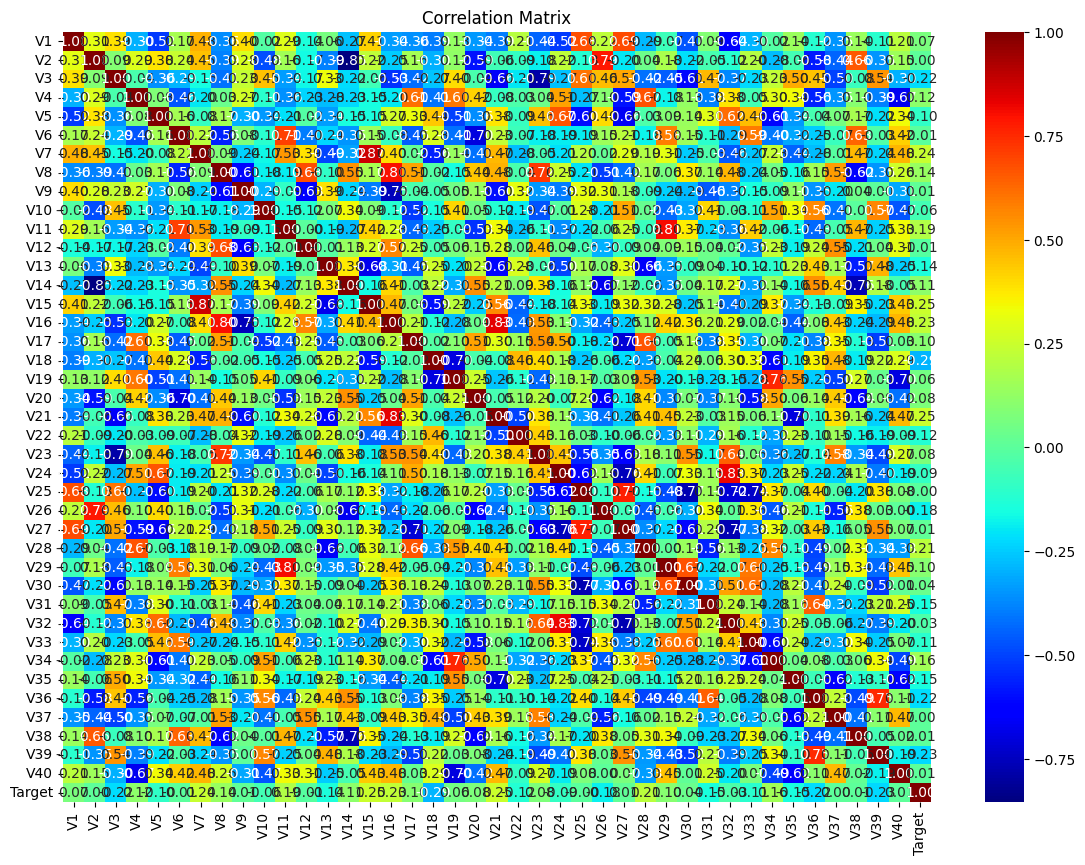

Highly correlated feature pairs (|correlation| > 0.9):


In [28]:
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap (optional, for visualization)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="jet", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Extract feature pairs with correlation > 0.9 (excluding self-correlation)
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.9:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_corr_pairs.append((col1, col2, corr_value))

# Display high correlation feature pairs
print("Highly correlated feature pairs (|correlation| > 0.9):")
for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]} => Correlation: {pair[2]:.2f}")

# **As we can see there is no better correlation between any feature combination so these features are independent of each other**

<H3>Standardization of Data</H3>

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(14,3,i+1)
    sns.histplot(X_train_scaled[:,i],kde=True)

<H2>Handling Missing Values</H2>

In [31]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
X_train_imp=si.fit_transform(X_train_scaled)
X_test_imp=si.transform(X_test_scaled)

In [32]:
X_train_df=pd.DataFrame(X_train_imp,columns=X_train.columns)
X_test_df=pd.DataFrame(X_test_imp,columns=X_test.columns)

In [33]:
X_train_df.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

In [34]:
X_train_df.duplicated().sum()

np.int64(0)

In [35]:
X_train_df.shape

(32000, 40)

<H3>Outlier Detection & Treatment</H3>

Using Z-score method as the features are already normally distributed

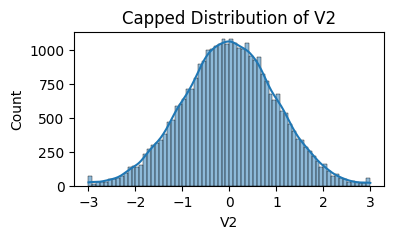

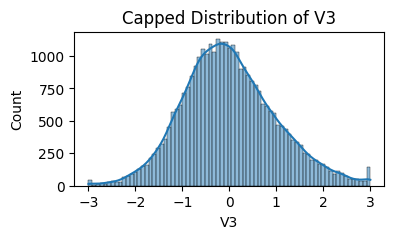

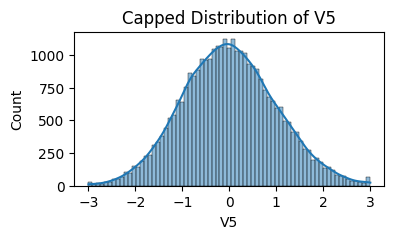

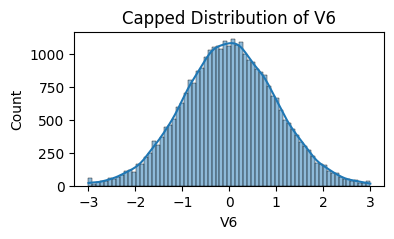

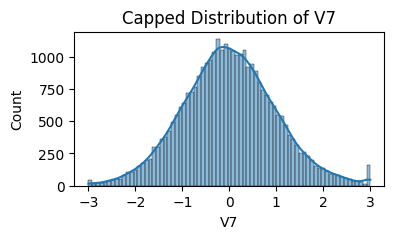

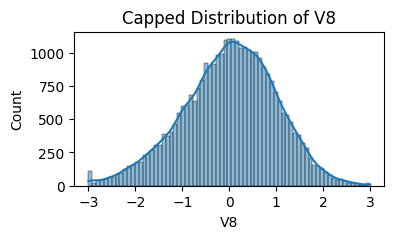

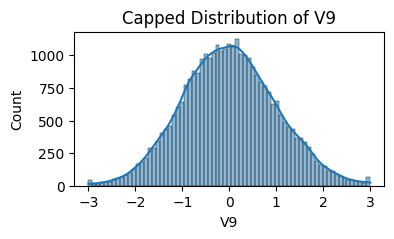

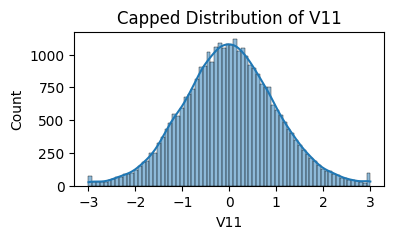

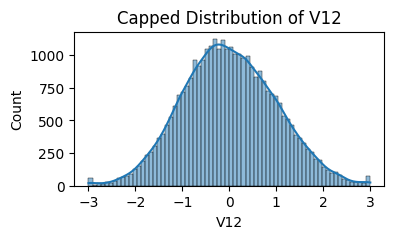

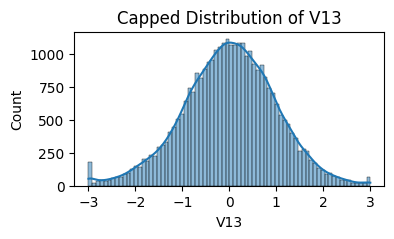

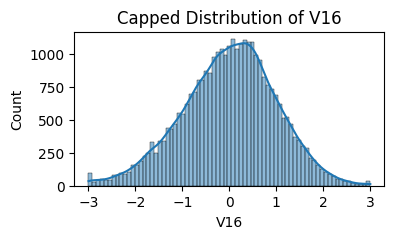

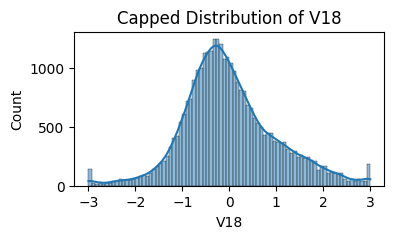

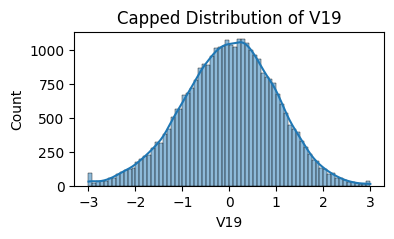

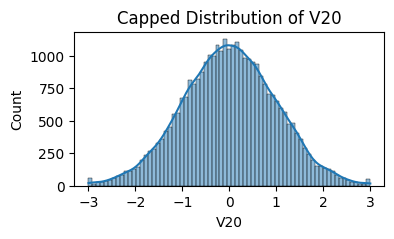

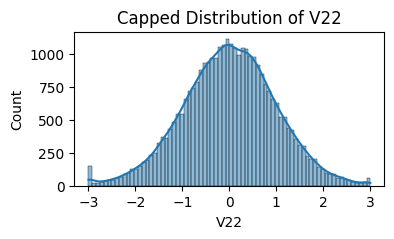

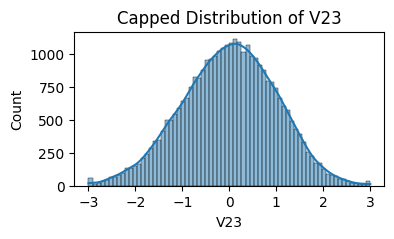

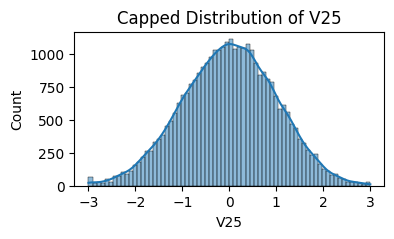

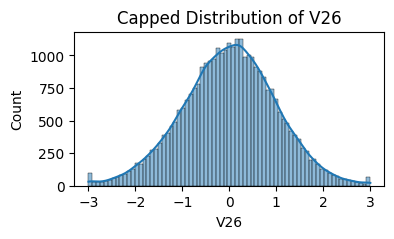

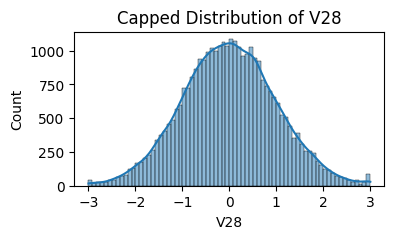

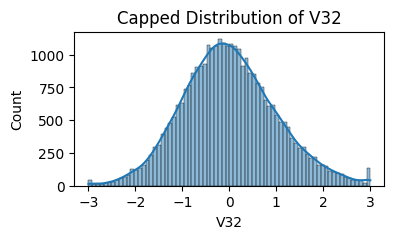

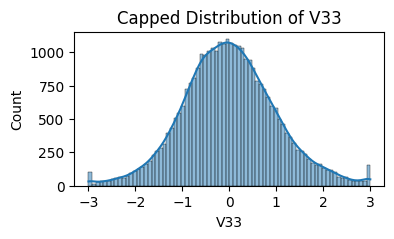

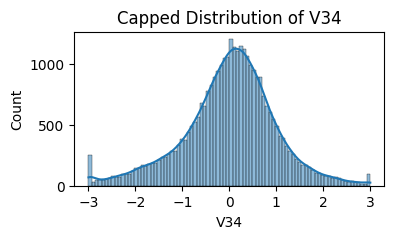

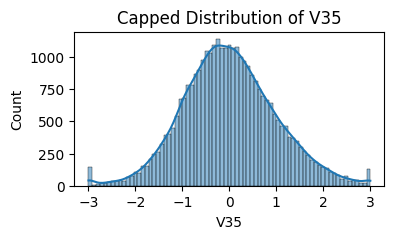

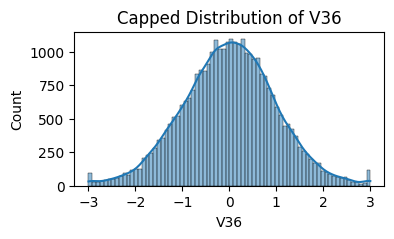

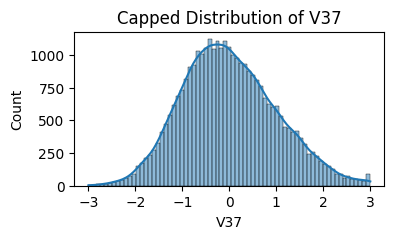

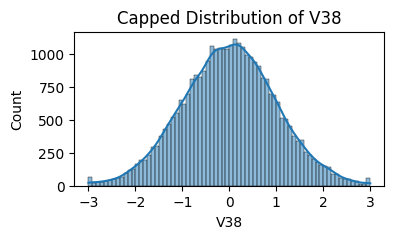

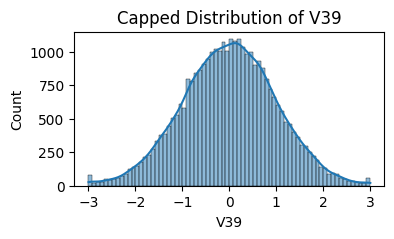

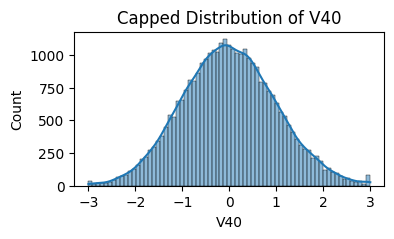

In [36]:
from scipy.stats import zscore
# Make a copy to preserve the original
X_train_df_capped = X_train_df.copy()

for i in range(1, 41):
    col = f"V{i}"
    z_scores = zscore(X_train_df_capped[col])

    # Find mean and std to convert ±3 z-score back to actual values
    mean = X_train_df_capped[col].mean()
    std = X_train_df_capped[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Clip values outside the bounds
    X_train_df_capped[col] = X_train_df_capped[col].clip(lower=lower_bound, upper=upper_bound)

    # Optional: visualize capped data
    plt.figure(figsize=(4, 2))
    sns.histplot(X_train_df_capped[col], kde=True)
    plt.title(f'Capped Distribution of {col}')
    plt.show()

Using IQ method as the features are already normally distributed

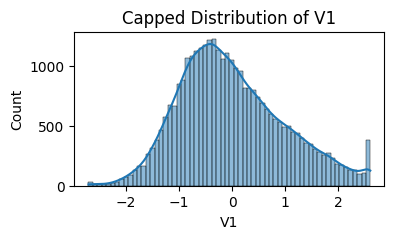

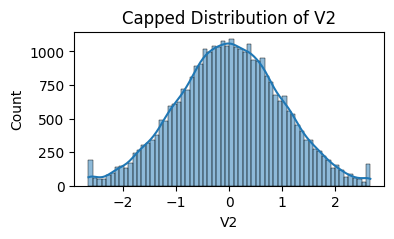

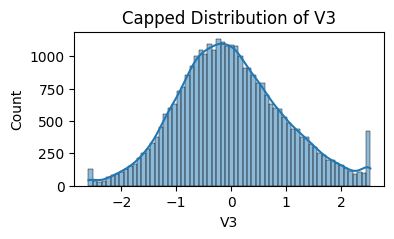

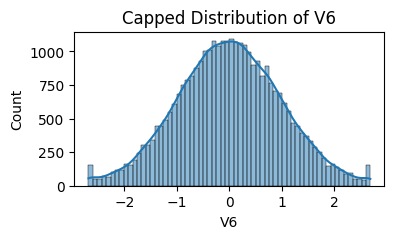

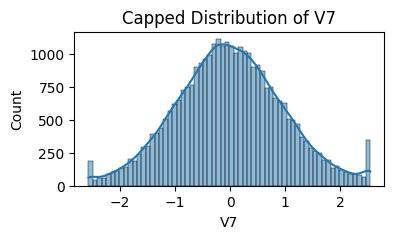

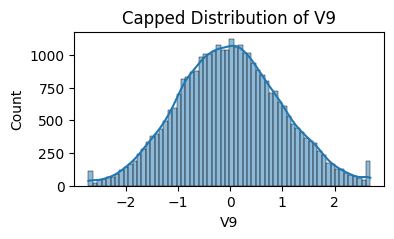

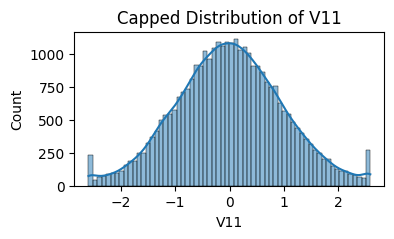

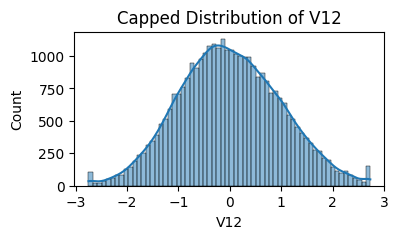

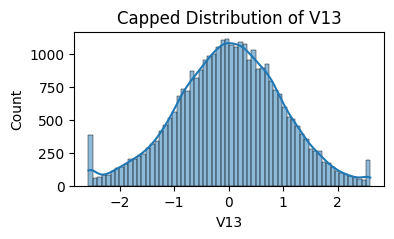

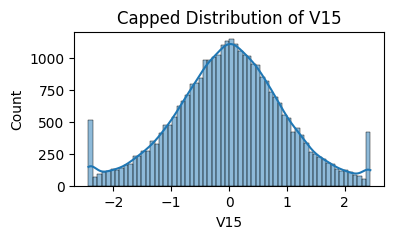

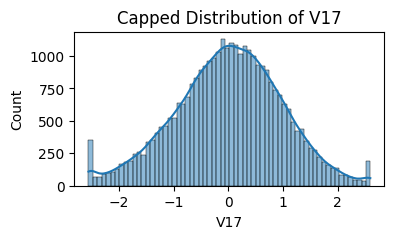

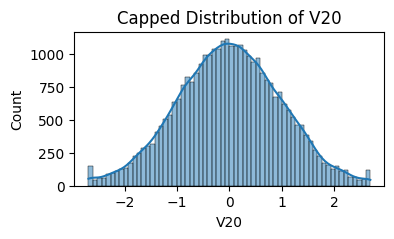

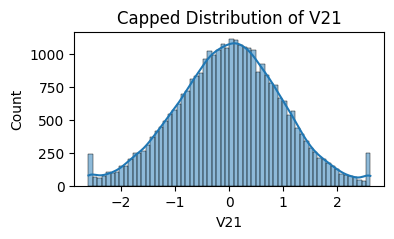

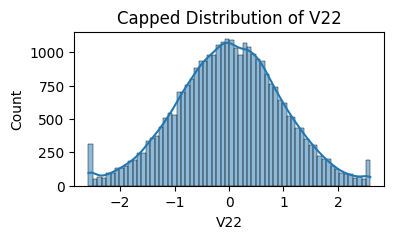

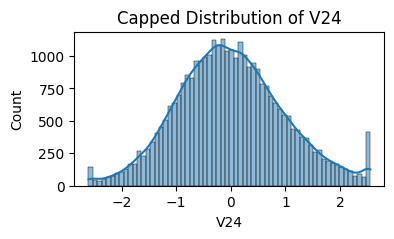

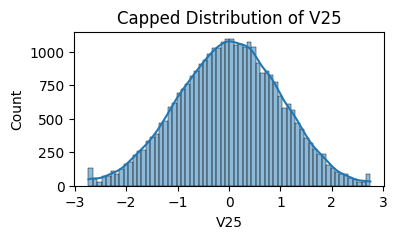

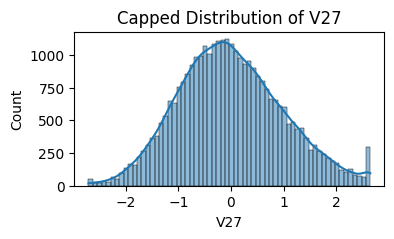

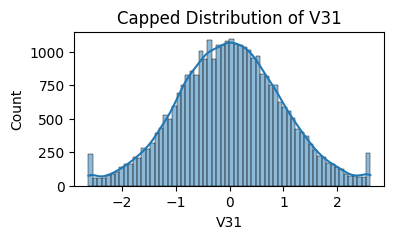

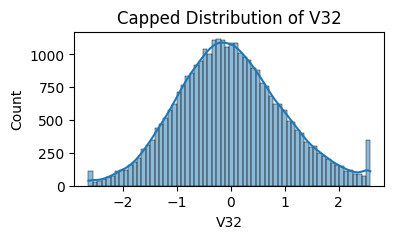

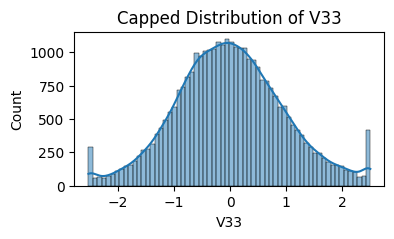

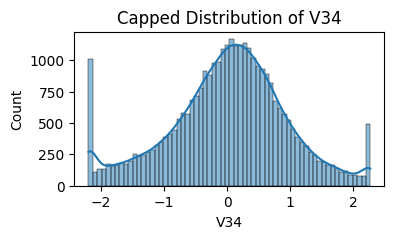

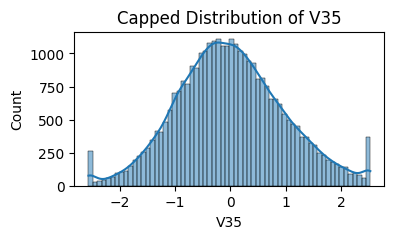

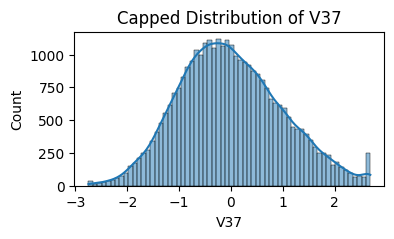

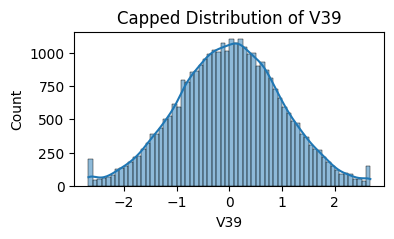

In [37]:
#using interquatile Range

X_train_df_cap=X_train_df.copy()
X_test_df_cap=X_test_df.copy()

for i in range(1,41):
    col=f"V{i}"

    Q1=X_train_df_cap[col].quantile(0.25)
    Q3=X_train_df_cap[col].quantile(0.75)
    IQR=Q3-Q1

    lower_b=Q1-(1.5*IQR)
    upper_b=Q3+(1.5*IQR)

    X_train_df_cap[col]=X_train_df_cap[col].clip(lower=lower_b,upper=upper_b)
    X_test_df_cap[col]=X_test_df_cap[col].clip(lower=lower_b,upper=upper_b)
      # Optional: visualize capped data
    plt.figure(figsize=(4, 2))
    sns.histplot(X_train_df_cap[col], kde=True)
    plt.title(f'Capped Distribution of {col}')
    plt.show()


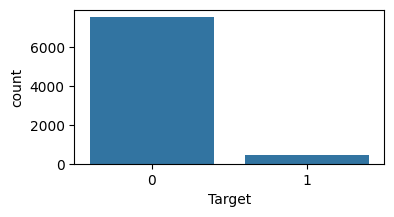

Target
0    7563
1     437
Name: count, dtype: int64

In [38]:
plt.figure(figsize=(4,2))
sns.countplot(x=y_test)
plt.show()
y_test.value_counts()

<h2>Feature Extraction</h2>

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
X_train_p=pca.fit_transform(X_train_df_cap)
X_test_p=pca.transform(X_train_df_cap)
X_train_p.shape

(32000, 20)

In [40]:
pca.explained_variance_

array([8.68832773e+00, 6.88961842e+00, 5.87072920e+00, 5.32617520e+00,
       3.49801070e+00, 2.88007785e+00, 2.10004024e+00, 1.43399844e+00,
       1.28953162e+00, 7.68114268e-01, 1.07653517e-02, 8.69193446e-03,
       5.43887163e-03, 4.95810108e-03, 4.79659513e-03, 4.44825835e-03,
       4.23206883e-03, 3.55345891e-03, 3.41192281e-03, 2.80425128e-03])

### **Model evaluation criterion**

## 3 types of cost are associated with the provided problem

*   Replacement cost - False Negatives - Predicting no failure, while there will be a failure
*   Inspection cost - False Positives - Predicting failure, while there is no failure
*   Repair cost - True Positives - Predicting failure correctly




## How to reduce the overall cost?

*   We need to create a customized metric, that can help to bring down the overall cost
*   The cost associated with any model = (TPX15000) + (FPX5000) + (FNX40000)
*   And the minimum possible cost will be when, the model will be able to identify all failures, in that case, the cost will be (TP + FN)X15000
*   So, we will try to maximize Minimum cost/Cost associated with model






Let's Create some functions for model scoring and evaluations

In [41]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (
        TP + FN
    ) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = (
        Min_Cost / Cost
    )  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

In [42]:
from sklearn.metrics import make_scorer

## **Defining Scoring Mechanism based the problem given**

In [43]:
def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)


# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

## **Model Building and Testing**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [ ]:
lr=LogisticRegression(n_jobs=-1,class_weight="balanced",random_state=1)
dt=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

models=[lr,dt,rf,gb,ada,xgb]
results=[]

In [ ]:
for model in models:
  skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
  cv_scores=cross_val_score(model,X_train_df_cap,y_train,cv=skf,scoring=scorer)
  print(f"{model}:{np.mean(cv_scores)}")

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=1):0.5151226590566904
DecisionTreeClassifier(random_state=1):0.6615011006431366
RandomForestClassifier():0.717489474034856
GradientBoostingClassifier():0.6756935207104316
AdaBoostClassifier():0.5485863489301279
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_paralle

## **HyperParameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
param_grid={
    'n_estimators':[100,150,200,250,300],
    "learning_rate":[0.05,0.1,0.2,0.3],
    "max_depth":[4,5,6,8,10],
    'scale_pos_weight':[9,10],
    "min_samples_split":[2,5,10,15,100],
    "min_samples_leaf":[5,10],
    "colsample_bytree":[0.5,0.8,1],
    "eval_metric":["logloss"]
}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
grid=RandomizedSearchCV(XGBClassifier(),param_grid,cv=kfold,scoring=scorer,n_jobs=-1,n_iter=200)
grid.fit(X_train_df_cap,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importanc...
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1],
                                        'eval_metric': ['logloss'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'max_depth': [4, 5, 6, 8, 10],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'scale_pos_weight': [9, 10]},
                   scoring=make_scorer(Minimum_Vs_Model_cost, response_method='predict'))

In [ ]:
grid.best_score_

np.float64(0.8136064570232904)

In [ ]:
grid.best_params_

{'scale_pos_weight': 10,
 'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 4,
 'learning_rate': 0.2,
 'eval_metric': 'logloss',
 'colsample_bytree': 1}

In [ ]:
model_performance_classification_sklearn(grid.best_estimator_,X_test_df_cap,y_test)

Accuracy    Recall  Precision       F1  Minimum_Vs_Model_cost
0  0.990625  0.869565   0.954774  0.91018               0.812268

In [64]:
test=pd.read_csv('ReckAir_Test_data.csv')
X=test.drop(['Target'],axis=1)
y=test['Target']
X_sc=scaler.transform(X)
X_imp=si.transform(X_sc)
X=pd.DataFrame(X_imp,columns=X.columns)

In [65]:
for i in range(1,41):
  col=f"V{i}"
  Q1=X_train_df_cap[col].quantile(0.25)
  Q3=X_train_df_cap[col].quantile(0.75)
  IQR=Q3-Q1
  lower_b=Q1-(1.5*IQR)
  upper_b=Q3+(1.5*IQR)
  X[col]=X[col].clip(lower=lower_b,upper=upper_b)

In [ ]:
model_performance_classification_sklearn(grid.best_estimator_,X,y)

Accuracy    Recall  Precision     F1  Minimum_Vs_Model_cost
0    0.9824  0.753199   0.909492  0.824               0.696224

In [ ]:
pd.DataFrame(confusion_matrix(y,grid.best_estimator_.predict(Xs)))

0    1
0  9412   41
1   135  412

In [ ]:
pd.DataFrame(confusion_matrix(y_test,grid.best_estimator_.predict(X_test_df_cap)))

0    1
0  7545   18
1    57  380

### **Model Building (XGBoost)**

In [81]:
xgb_tuned=XGBClassifier(n_estimators=350,max_depth=8,subasample=0.9,scale_pos_weight=10,learning_rate=0.2,min_samples_split=15,min_samples_leaf=15,eval_metric="logloss",alpha=1,lambda_=1,colsample_bytree=0.8)

In [82]:
xgb_tuned.fit(X_train_df_cap,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_", "min_samples_leaf", "min_samples_split", "subasample" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda_=1,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, min_samples_leaf=15,
              min_samples_split=15, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

In [83]:
#validation score
model_performance_classification_sklearn(xgb_tuned,X_test_df_cap,y_test)

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.991875  0.881007   0.967337  0.922156               0.827652

In [84]:
#unseen data score
model_performance_classification_sklearn(xgb_tuned,X,y)

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9905  0.855576   0.966942  0.907856               0.799708

In [85]:
pd.DataFrame(confusion_matrix(y,xgb_tuned.predict(X)))

0    1
0  9437   16
1    79  468

In [91]:
xgb_tuned3=XGBClassifier(
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=3,
    random_state=1,
    eval_metric="logloss"
)
xgb_tuned3.fit(X_train_df,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
model_performance_classification_sklearn(xgb_tuned3,X_test_df,y_test)

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.990875  0.885584   0.943902  0.913813               0.827652

In [ ]:
model_performance_classification_sklearn(xgb_tuned3,X,y)

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9886  0.846435   0.939148  0.890385               0.784792

## PipeLine building for Model

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [49]:
def iqr_capping(X):
    # Ensure X is a DataFrame
    X = pd.DataFrame(X, columns=[f"V{i}" for i in range(1, X.shape[1]+1)])
    X_capped = X.copy()

    for col in X.columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_b = Q1 - 1.5 * IQR
        upper_b = Q3 + 1.5 * IQR
        X_capped[col] = X[col].clip(lower=lower_b, upper=upper_b)

    return X_capped.values  # return as numpy array for transformer compatibility

iqr_transformer = FunctionTransformer(iqr_capping, validate=False)


In [53]:
xgb_mod=XGBClassifier(
    n_estimators=350,
    max_depth=8,
    subasample=0.9,
    scale_pos_weight=10,
    learning_rate=0.2,
    min_samples_split=15,
    min_samples_leaf=15,
    eval_metric="logloss",
    alpha=1,
    lambda_=1,
    colsample_bytree=0.8
)

In [71]:
trf=ColumnTransformer([
    ('scale',StandardScaler(),X_train_df_cap.columns),
    ('impute',SimpleImputer(strategy='mean'),X_train_df_cap.columns),
    ('outlier_cap',iqr_transformer,[i for i in X_train_df_cap.columns])
]
    ,remainder='passthrough')

In [72]:
pipe=Pipeline([
    ('trf',trf),
    ('clf',xgb_mod)
])

In [73]:
pipe.fit(X_train_df_cap,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_", "min_samples_leaf", "min_samples_split", "subasample" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40'],
      dtype=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda_=1,
                               learning_rate=0.2, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=None,
                               min_samples_leaf=15, min_samples_split=15,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, ...))])

In [74]:
model_performance_classification_sklearn(pipe,X_test_df_cap,y_test)

Accuracy    Recall  Precision       F1  Minimum_Vs_Model_cost
0  0.991125  0.874142   0.959799  0.91497               0.818352

In [75]:
model_performance_classification_sklearn(pipe,X,y)

Accuracy   Recall  Precision        F1  Minimum_Vs_Model_cost
0      0.99  0.85192   0.960825  0.903101               0.794673

In [76]:
pd.DataFrame(confusion_matrix(y,pipe.predict(X)))

0    1
0  9434   19
1    81  466

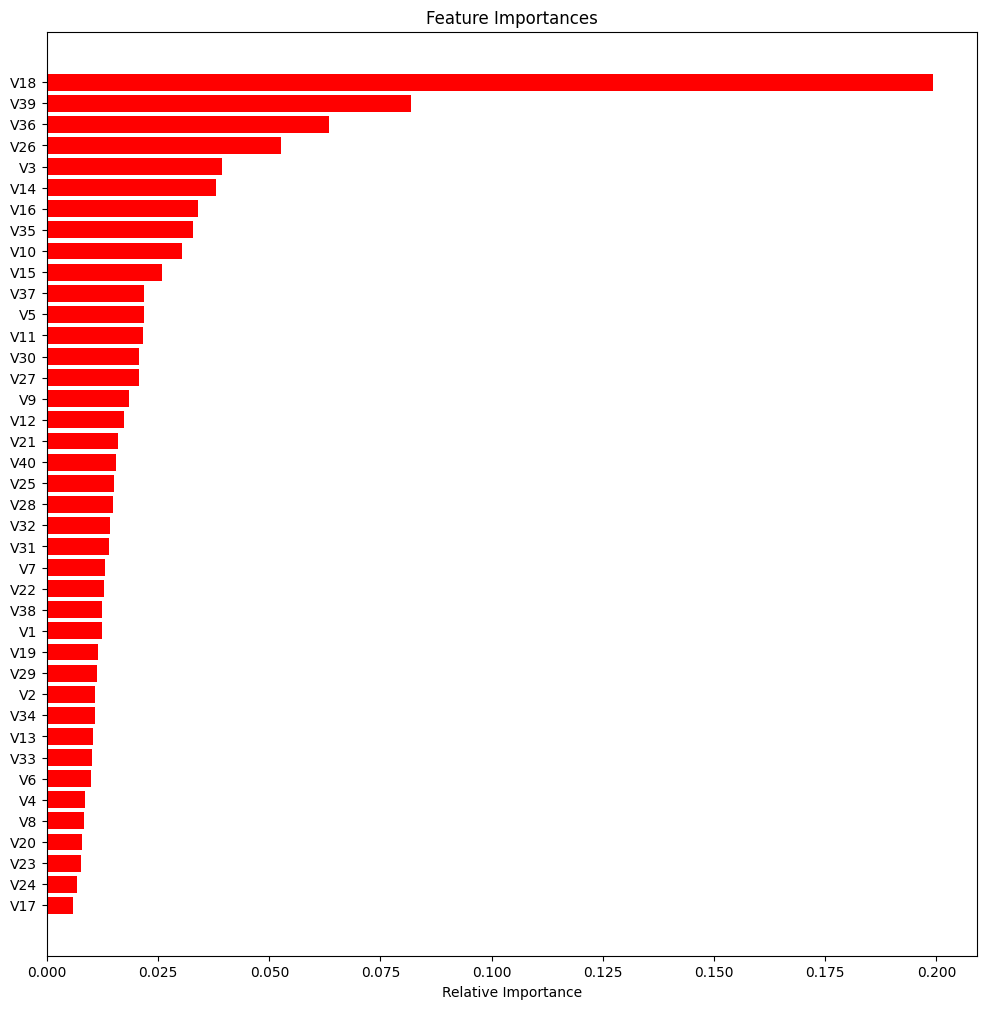

In [92]:
feature_names = X_train_df.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

As we can see that "V18,V39,V36,V26,V3" These are the top 5 feature columns that contributes most for the failure or no failure of any Machinery

### **Exporting The Model**

In [78]:
import joblib

In [79]:
joblib.dump(pipe,'ReckAir.pkl')

['ReckAir.pkl']

In [96]:
Minimum_Vs_Model_cost(y,pipe.predict(X))

np.float64(0.7946731234866828)

The ratio of  minimum maintenance cost v/s minimized maintenance cost is 0.794 which mean that if that is after hypertuning model and It is better than the scores that we got using cross validation

## 📊 Business Insights and Conclusions

- A machine learning-based solution has been built to optimize and minimize the total maintenance cost of machinery/processes used in wind energy production.

  - The final model, **XGBoost**, was selected after evaluating ~7 different algorithms. It was chosen based on its performance in handling highly imbalanced data (few "failures" vs. many "no failures") and was further fine-tuned using **hyperparameter optimization** and **cross-validation** techniques.

  - A complete **ML pipeline** was developed to enable smooth deployment of the chosen model in a production environment.

- To evaluate the real-world impact, a **custom cost-based scoring function** was designed. This function compares the model's predicted maintenance cost against the theoretical minimum. It assigns weights to different types of prediction errors:
  
  - **True Positive (TP)**: Cost = 15  
  - **False Positive (FP)**: Cost = 5  
  - **False Negative (FN)**: Cost = 40  
  - **Theoretical Minimum Cost** (no errors) = (TP + FN) * 40  
  - **Model Cost** = (TP × 15 + FP × 5 + FN × 40)  
  - **Score = (TP + FN) × 15 / (TP × 15 + FP × 5 + FN × 40)**

- According to this scoring mechanism:
  - The **theoretical minimum cost** assumes perfect predictions (every failure is correctly predicted).
  - The trained model's cost is approximately **1.26×** the theoretical minimum — indicating strong performance with room for improvement.
  - In contrast, **not using any model** (e.g., predicting no failures at all) could lead to costs as high as **2.67×** the minimum — due to missed failure predictions (false negatives), which are the most expensive.

- The model thus provides a significant **cost-saving advantage** by reducing false negatives, which are heavily penalized in the custom scoring scheme.

- The most influential variables in predicting failures (in decreasing order of importance) were:
  - **"V18", "V39", "V26", "V3", and "V10"**
  - This insight supports the strategic enhancement of sensor data collection and monitoring, particularly from these high-importance variables, to further improve model accuracy and reduce costs.

- Overall, this model demonstrates how a **domain-specific evaluation metric** can align machine learning performance with real-world financial impact — optimizing for actual cost rather than abstract accuracy.
